# This code file looks into Research Question 1
## Here we explore and analyze patterns in the data by  plotting frequency histograms and time series plots looking at incident types by human activity, animals involved, location, and time of year. 

*NOTE: The data variable named "Protected Heritage Area" refers to the 35 different **Canadian National Parks** included in the data. In all plot titles and labels, I refer to them as "Canadian National Parks" to assist in clarity as "Protected Heritage Area" can be a bit vague/unclear as to what it refers to. 

**First, I import all the packages I'll be using throughout this file:**

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import *
from matplotlib.pyplot import figure
import numpy as np
import matplotlib.colors as mcolors
import calendar
from datetime import datetime

In [2]:
#Used to view long lists of output if needed
#pd.set_option('display.height', 1000)
#pd.set_option('display.max_rows', 500)
#pd.set_option('display.max_columns', 500)
#pd.set_option('display.width', 1000)

**Next, I import my dataset and set the datatypes as appropriate:**

In [68]:
Complete_HWC_Data = pd.read_csv("/Users/nerdbear/Downloads/Complete_HWC_Data.csv", index_col=0, dtype=str, encoding='utf8')
Complete_HWC_Data[Complete_HWC_Data.columns[0:20]] = Complete_HWC_Data[Complete_HWC_Data.columns[0:20]].astype("str")

Complete_HWC_Data["Sum of Number of Animals"] = Complete_HWC_Data["Sum of Number of Animals"].astype("float")
Complete_HWC_Data["Total Staff Hours"] = Complete_HWC_Data["Total Staff Hours"].astype("float")
Complete_HWC_Data["Total Staff Involved"] = Complete_HWC_Data["Total Staff Involved"].astype("float")
Complete_HWC_Data["Latitude Public"] = Complete_HWC_Data["Latitude Public"].astype("float")
Complete_HWC_Data["Longitude Public"] = Complete_HWC_Data["Longitude Public"].astype("float")
#Complete_HWC_Data["Species Common Name"] = Complete_HWC_Data["Species Common Name"].astype("str")
Complete_HWC_Data[Complete_HWC_Data.columns[20:158]] = Complete_HWC_Data[Complete_HWC_Data.columns[20:170]].astype("float")
#Complete_HWC_Data["Animal Health Status"] = Complete_HWC_Data["Animal Health Status"].astype("str")
#Complete_HWC_Data["Cause of Animal Health Status"] = Complete_HWC_Data["Cause of Animal Health Status"].astype("str")
Complete_HWC_Data.head()


UniqueID Incident Number Incident Date         Field Unit  \
0  BAN2010-0003.3    BAN2010-0003    2010-01-01   Banff Field Unit   
1  BAN2010-0003.2    BAN2010-0003    2010-01-01   Banff Field Unit   
2  BAN2010-0003.1    BAN2010-0003    2010-01-01   Banff Field Unit   
3  JNP2010-0011.1    JNP2010-0011    2010-01-01  Jasper Field Unit   
4  JNP2010-0015.1    JNP2010-0015    2010-01-01  Jasper Field Unit   

          Protected Heritage Area                     Incident Type  \
0   Banff National Park of Canada        Human Wildlife Interaction   
1   Banff National Park of Canada        Human Wildlife Interaction   
2   Banff National Park of Canada        Human Wildlife Interaction   
3  Jasper National Park of Canada  Rescued/Recovered/Found Wildlife   
4  Jasper National Park of Canada                        Attractant   

   Latitude Public  Longitude Public Within Park  Total Staff Involved  ...  \
0        51.161093       -115.593386         Yes                   1.0  ...   
1        51.161093       -115.593386         Yes                   1.0  ...   
2        51.161093       -115.593386         Yes                   1.0  ...   
3        53.139120       -117.964219         Yes                   1.0  ...   
4        53.050492       -118.073612         Yes                   1.0  ...   

   Response Type_Rehabilitate area Response Type_Relocate animal (s)  \
0                              0.0                               0.0   
1                              0.0                               0.0   
2                              0.0                               0.0   
3                              0.0                               0.0   
4                              0.0                               0.0   

   Response Type_Request assistance - other Agency  \
0                                              0.0   
1                                              0.0   
2                                              0.0   
3                                              0.0   
4                                              0.0   

  Response Type_Request assistance - police Response Type_Traffic control  \
0                                       0.0                           0.0   
1                                       0.0                           0.0   
2                                       0.0                           0.0   
3                                       0.0                           0.0   
4                                       0.0                           0.0   

  Response Type_Translocate Response Type_Trap or snare  \
0                       0.0                         0.0   
1                       0.0                         0.0   
2                       0.0                         0.0   
3                       0.0                         0.0   
4                       0.0                         0.0   

  Response Type_Unable to respond Response Type_Warning signs  \
0                             0.0                         0.0   
1                             0.0                         0.0   
2                             0.0                         0.0   
3                             0.0                         0.0   
4                             0.0                         0.0   

  Response Type_nan  
0               0.0  
1               0.0  
2               0.0  
3               0.0  
4               0.0  

[5 rows x 158 columns]

**Setting up variables here that are used in plotting below:**

In [69]:
Complete_HWC_Data_Month = Complete_HWC_Data.loc[:, ("Incident Type", "Field Unit", "Incident Date")]
Complete_HWC_Data_Month["Incident Month"] = pd.to_datetime(Complete_HWC_Data_Month["Incident Date"]).dt.to_period("M")
Complete_HWC_Data_Month["Incident Month"] = Complete_HWC_Data_Month["Incident Month"].astype("str")
Complete_HWC_Data_Month["Incident Month"] = pd.to_datetime(Complete_HWC_Data_Month["Incident Month"])
#Complete_HWC_Data_Month
Complete_HWC_Data_Month = Complete_HWC_Data_Month.set_index("Incident Date")
Complete_HWC_Data_Month["Incident Month"] = pd.DatetimeIndex(Complete_HWC_Data_Month.index).month
#Complete_HWC_Data_Month
Complete_HWC_Data_Month = Complete_HWC_Data_Month.replace({'Incident Month' : { 1 : "January", 2 : "February", 3 : "March", 4 : "April", 5 : "May", 6 : "June", 7 : "July", 8 : "August", 9 : "September", 10 : "October", 11 : "November", 12 : "December"}})
Complete_HWC_Data_Month["Incident Month"] = Complete_HWC_Data_Month["Incident Month"].astype('category')
Complete_HWC_Data_Month["Incident Month"] = Complete_HWC_Data_Month["Incident Month"].cat.reorder_categories(["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"], ordered=True)
Complete_HWC_Data_Month["Incident Month"].cat.categories

IncidentsByMonth = Complete_HWC_Data_Month["Incident Type"].groupby([Complete_HWC_Data_Month["Incident Month"], Complete_HWC_Data_Month["Incident Type"]]).count().reset_index(name="count")
IncidentsByMonth = IncidentsByMonth.pivot_table("count", "Incident Month", "Incident Type")
#IncidentsByMonth

Complete_HWC_Data_Year = Complete_HWC_Data.loc[:, ("Incident Type", "Field Unit", "Incident Date", "Protected Heritage Area")]
Complete_HWC_Data_Year["Incident Year"] = pd.to_datetime(Complete_HWC_Data_Year["Incident Date"]).dt.to_period("Y")
Complete_HWC_Data_Year["Incident Year"] = Complete_HWC_Data_Year["Incident Year"].astype("str")
Complete_HWC_Data_Year["Incident Year"] = pd.to_datetime(Complete_HWC_Data_Year["Incident Year"])
#Complete_HWC_Data_Year

IncidentsByYear = Complete_HWC_Data_Year["Incident Type"].groupby([Complete_HWC_Data_Year["Incident Year"], Complete_HWC_Data_Year["Incident Type"]]).count().reset_index(name="count")
#IncidentsByYear
IncidentsByYear = IncidentsByYear.pivot_table("count", "Incident Year", "Incident Type")
#IncidentsByYear

Parks = Complete_HWC_Data_Year["Protected Heritage Area"].unique()
#Parks

IncidentsByPark = Complete_HWC_Data_Year["Protected Heritage Area"].groupby([Complete_HWC_Data_Year["Protected Heritage Area"]]).count().reset_index(name="count")
IncidentsByPark = IncidentsByPark.pivot_table("count", "Protected Heritage Area")
#IncidentsByPark.index
IncidentsByPark=IncidentsByPark.sort_values(by=['count'])
#IncidentsByPark

HighIncParks = IncidentsByPark.loc[IncidentsByPark["count"] >1000]
#HighIncParks

IncidentsByYearByPark = Complete_HWC_Data_Year["Protected Heritage Area"].groupby([Complete_HWC_Data_Year["Incident Year"], Complete_HWC_Data_Year["Protected Heritage Area"]]).count().reset_index(name="count")
IncidentsByYearByPark = IncidentsByYearByPark.pivot_table("count", "Incident Year", "Protected Heritage Area")
#IncidentsByYearByPark

IncidentsByTypeByPark = Complete_HWC_Data_Year["Incident Type"].groupby([Complete_HWC_Data_Year["Protected Heritage Area"], Complete_HWC_Data_Year["Incident Type"]]).count().reset_index(name="count")
IncidentsByTypeByPark = IncidentsByTypeByPark.sort_values(by="count")
IncidentsByTypeByPark = IncidentsByTypeByPark.sort_values(by="Protected Heritage Area")
IncidentsByPark=IncidentsByPark.sort_values(by=['count',])
#IncidentsByTypeByPark

IncidentsByTypeByPark = IncidentsByTypeByPark.pivot_table("count", "Protected Heritage Area","Incident Type",)
#IncidentsByTypeByPark

##
#The for loop I use below doesn't function how I wanted - and I ran out of time to get it 
#to do exactly what I wanted it to do (count frequency of Incident Types by Species). 
#I'm still using the output of the loop as it does provide counts by species, and 
#can be used to plot only the species that are included in more than 100 incidents. 
#If I can get the for loop working properly later on, I'll be able to plot the Species 
#and Incident Types better. ValueCounts = Complete_HWC_Data["Species Common Name"].value_counts()


ValueCounts = Complete_HWC_Data["Species Common Name"].value_counts()

SpeciesData = Complete_HWC_Data.loc[:, ("Incident Type", "Species Common Name")]

Counts = []
for i in Complete_HWC_Data["Species Common Name"]:
                Counts.append(ValueCounts[i])
SpeciesData.insert(0, "Species_Counts", Counts)
#SpeciesData

HighSpeciesData = SpeciesData.loc[SpeciesData["Species_Counts"] > 100]
HighSpeciesData=HighSpeciesData.sort_values(by=['Species_Counts'])
HighSpeciesCount = HighSpeciesData["Species Common Name"].unique()
#HighSpeciesCount

###

IncBySpecies = Complete_HWC_Data.loc[:, ("Incident Type", "Species Common Name")]
IncBySpecies = IncBySpecies["Incident Type"].groupby([IncBySpecies["Species Common Name"], IncBySpecies["Incident Type"]]).count().reset_index(name="count")
IncBySpecies = IncBySpecies.set_index("Incident Type")
#Complete_HWC_Data["Incident Type"].loc[Complete_HWC_Data["Species Common Name"]=="Black Bear"]
IncBySpecies = IncBySpecies.pivot_table("count", "Incident Type", "Species Common Name")


#IncBySpecies

HealthBySpecies = Complete_HWC_Data.loc[:, ("Animal Health Status", "Species Common Name")]
HealthBySpecies = HealthBySpecies["Animal Health Status"].groupby([HealthBySpecies["Species Common Name"], HealthBySpecies["Animal Health Status"]]).count().reset_index(name="count")
HealthBySpecies = HealthBySpecies.loc[HealthBySpecies["Animal Health Status"] != "Not Applicable"]
HealthBySpecies = HealthBySpecies.set_index("Animal Health Status")
#Complete_HWC_Data["Incident Type"].loc[Complete_HWC_Data["Species Common Name"]=="Black Bear"]
HealthBySpecies = HealthBySpecies.pivot_table("count", "Animal Health Status", "Species Common Name")
#HealthBySpecies 

SpeciesByHealth = Complete_HWC_Data.loc[:, ("Animal Health Status", "Species Common Name")]
SpeciesByHealth = SpeciesByHealth["Animal Health Status"].groupby([SpeciesByHealth["Species Common Name"], SpeciesByHealth["Animal Health Status"]]).count().reset_index(name="count")
SpeciesByHealth = SpeciesByHealth.loc[SpeciesByHealth["Animal Health Status"] != "Not Applicable"]
SpeciesByHealth = SpeciesByHealth.set_index("Species Common Name")
SpeciesByHealth = SpeciesByHealth.pivot_table("count","Species Common Name", "Animal Health Status")
#SpeciesByHealth



### The following section generates basic frequency histograms to view the trends in "Incident Types" over various other variables such as human activities, animals involved, cause of animal behaviour, location, etc.

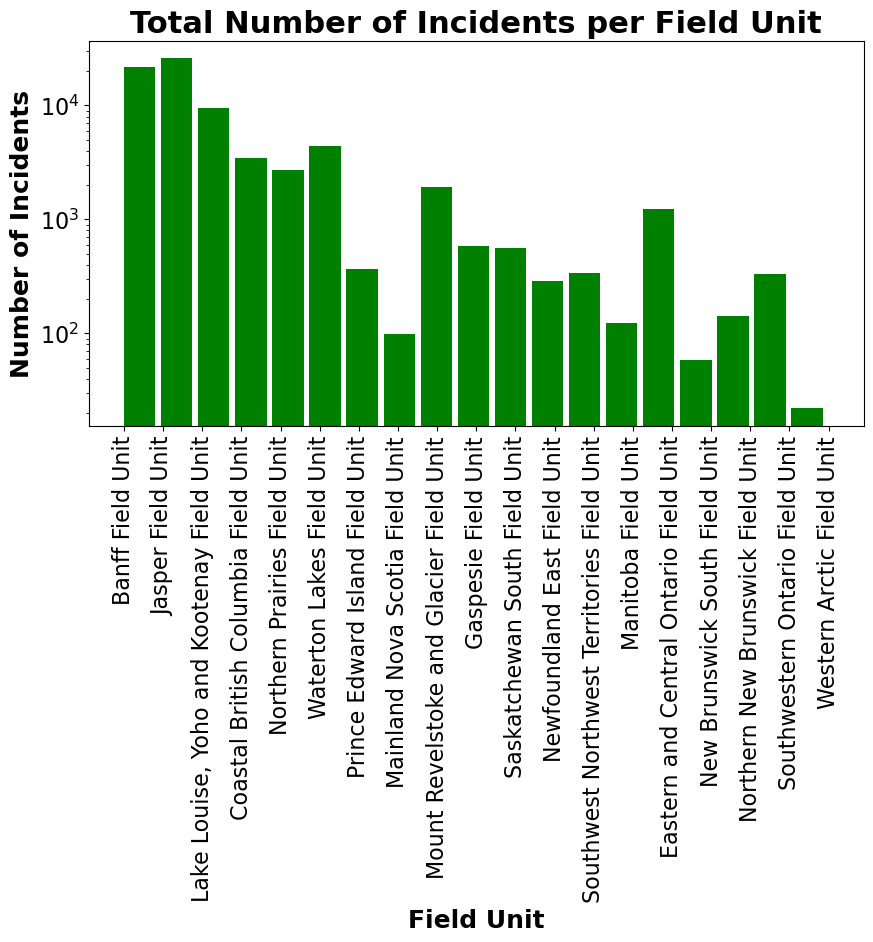

In [70]:
#Note, I've applied a logarithmic y-scale to be able to better view the x values which had very low y values.

plt.figure(figsize=(10,5));
plt.hist(Complete_HWC_Data["Field Unit"], width = 0.8, bins = 19, color = "green")
plt.ylabel('Number of Incidents', fontweight="bold", size = 18)
plt.xlabel('Field Unit', fontweight="bold", size = 18);
plt.title('Total Number of Incidents per Field Unit', fontweight="bold", size = 22)
plt.xticks(size=16, rotation='vertical')
plt.yticks(size=16)
plt.yscale('log')
plt.show()

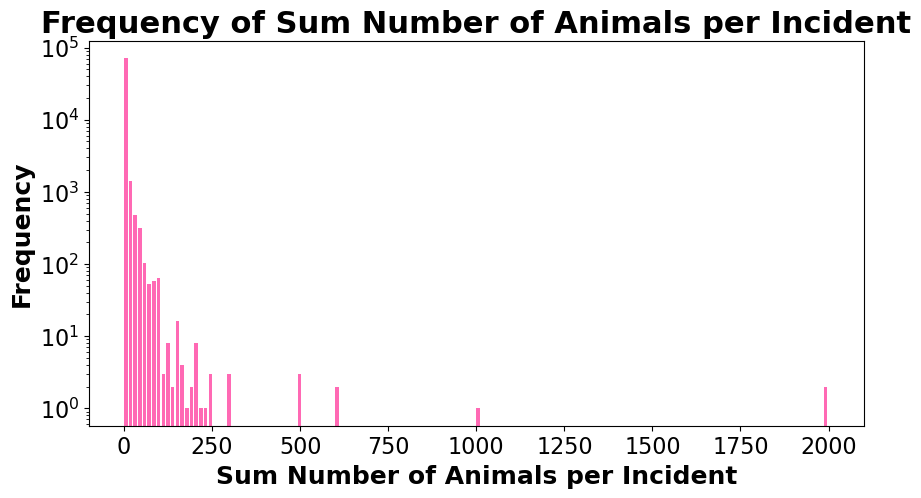

In [95]:
#Note, I've applied a logarithmic y-scale to be able to better view the x values which had very low y values.

plt.figure(figsize=(10,5));
plt.hist(Complete_HWC_Data["Sum of Number of Animals"],width = 10, bins = 150, color="hotpink")
plt.ylabel('Frequency', fontweight="bold", size = 18)
plt.xlabel('Sum Number of Animals per Incident', fontweight="bold", size = 18);
plt.title('Frequency of Sum Number of Animals per Incident', fontweight="bold", size = 22)
plt.xticks(size=16)
plt.yticks(size=16)
plt.yscale('log')
plt.show()

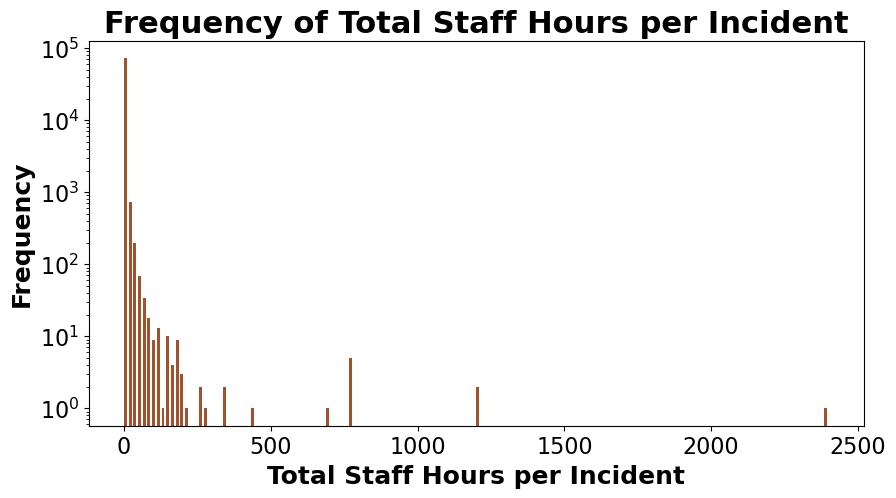

In [96]:
#Note, I've applied a logarithmic y-scale to be able to better view the x values which had very low y values.

plt.figure(figsize=(10,5));
plt.hist(Complete_HWC_Data["Total Staff Hours"],width = 10, bins = 150, color="sienna")
plt.ylabel('Frequency', fontweight="bold", size = 18)
plt.xlabel('Total Staff Hours per Incident', fontweight="bold", size = 18);
plt.title('Frequency of Total Staff Hours per Incident', fontweight="bold", size = 22)
plt.xticks(size=16)
plt.yticks(size=16)
plt.yscale('log')
plt.show()

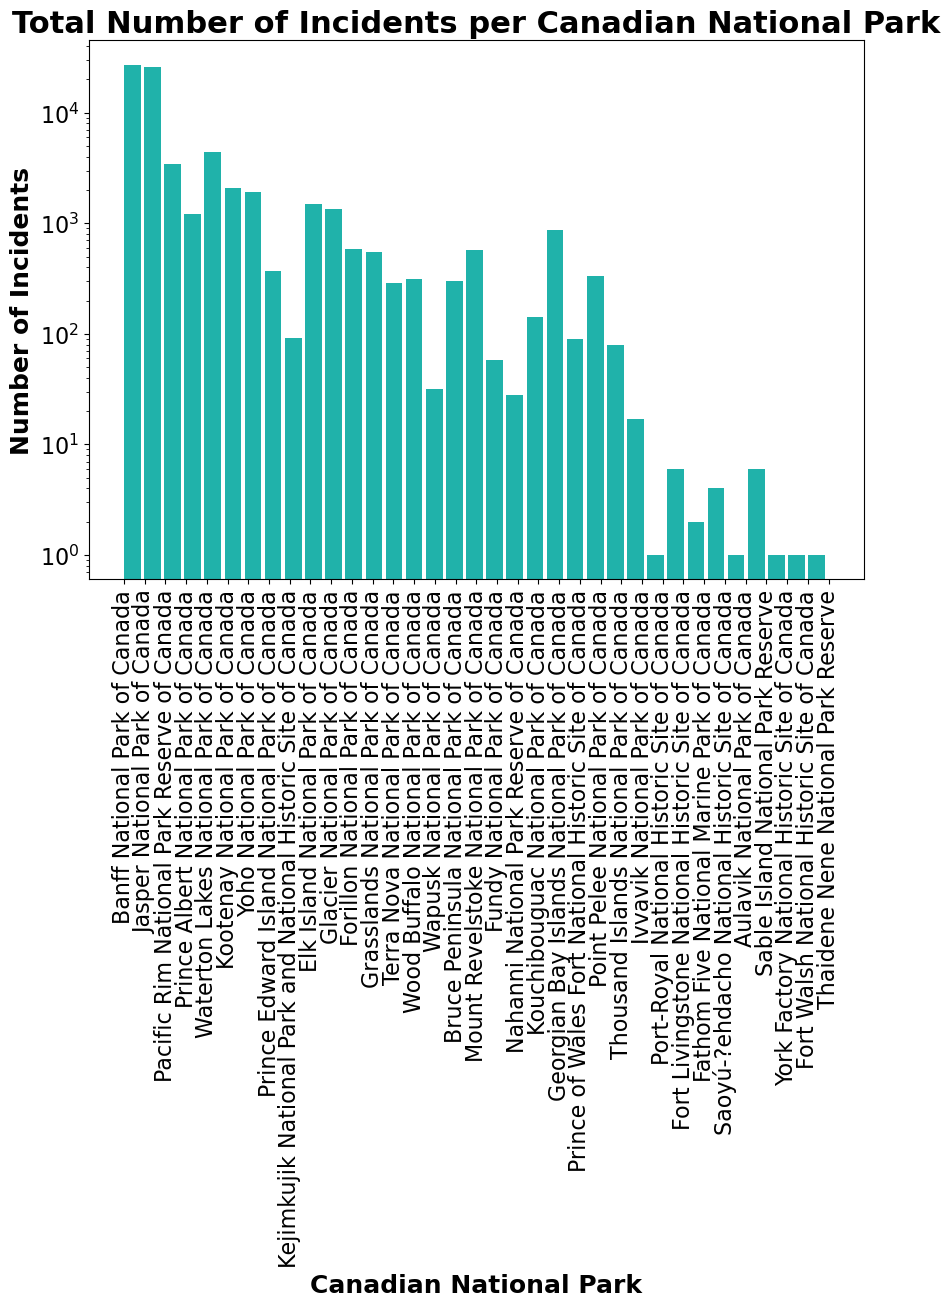

In [6]:
#Note, I've applied a logarithmic y-scale to be able to better view the x values which had very low y values.

plt.figure(figsize=(10,7));
plt.hist(Complete_HWC_Data["Protected Heritage Area"], width = 0.8, bins = 35, color = "lightseagreen")
plt.ylabel('Number of Incidents', fontweight="bold", size = 18)
plt.xlabel('Canadian National Park', fontweight="bold", size = 18);
plt.title('Total Number of Incidents per Canadian National Park', fontweight="bold", size = 22)
plt.xticks(size=16, rotation='vertical')
plt.yticks(size=16)
plt.yscale('log')
plt.show()


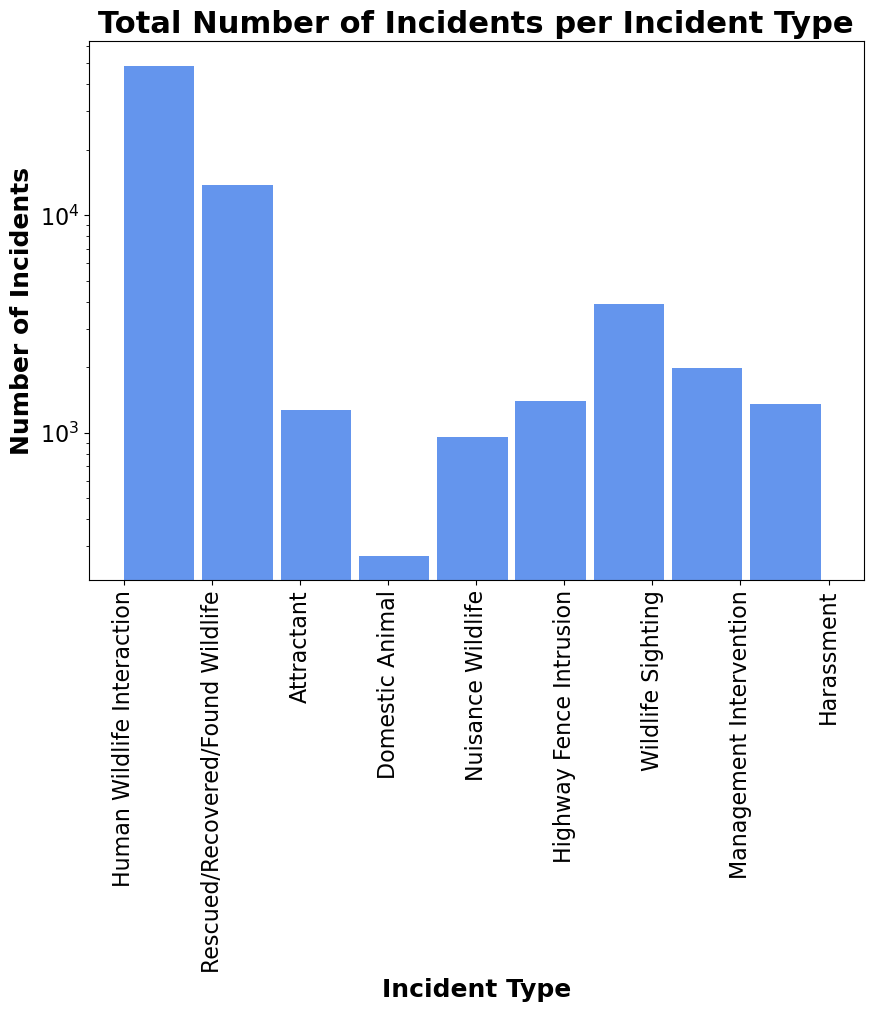

In [27]:
#Note, I've applied a logarithmic y-scale to be able to better view the x values which had very low y values.

plt.figure(figsize=(10,7));
plt.hist(Complete_HWC_Data["Incident Type"], width = 0.8, bins = 9, color = "cornflowerblue")
plt.ylabel('Number of Incidents', fontweight="bold", size = 18)
plt.xlabel('Incident Type', fontweight="bold", size = 18);
plt.title('Total Number of Incidents per Incident Type', fontweight="bold", size = 22)
plt.xticks(size=16, rotation='vertical')
plt.yticks(size=16)
plt.yscale('log')
plt.show()


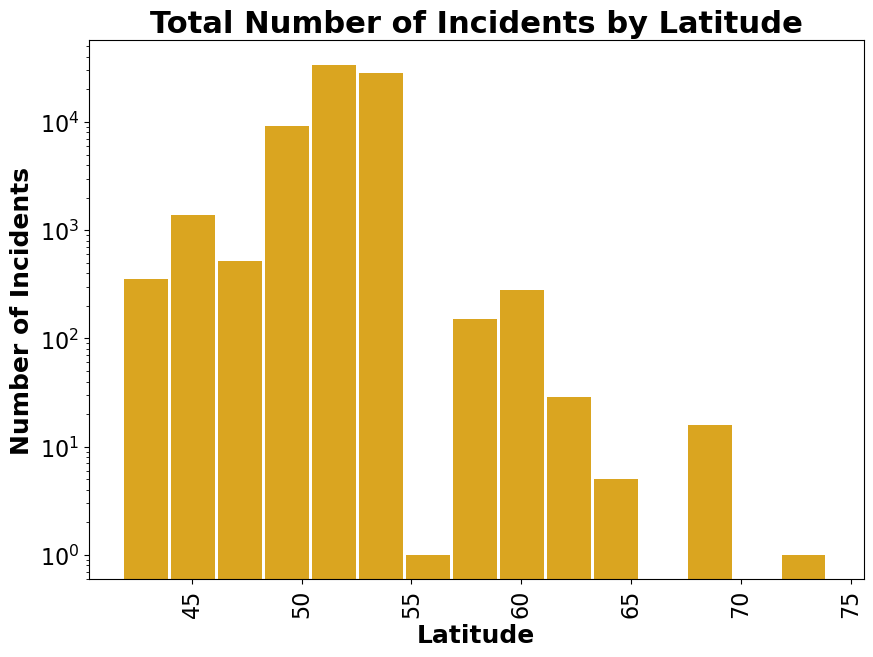

In [28]:
#Note, I've applied a logarithmic y-scale to be able to better view the x values which had very low y values.

plt.figure(figsize=(10,7));
plt.hist(Complete_HWC_Data["Latitude Public"],width=2, bins=15, color = "goldenrod")
plt.ylabel('Number of Incidents', fontweight="bold", size = 18)
plt.xlabel('Latitude', fontweight="bold", size = 18);
plt.title('Total Number of Incidents by Latitude', fontweight="bold", size = 22)
plt.xticks(size=16, rotation='vertical')
plt.yticks(size=16)
plt.yscale('log')
plt.show()


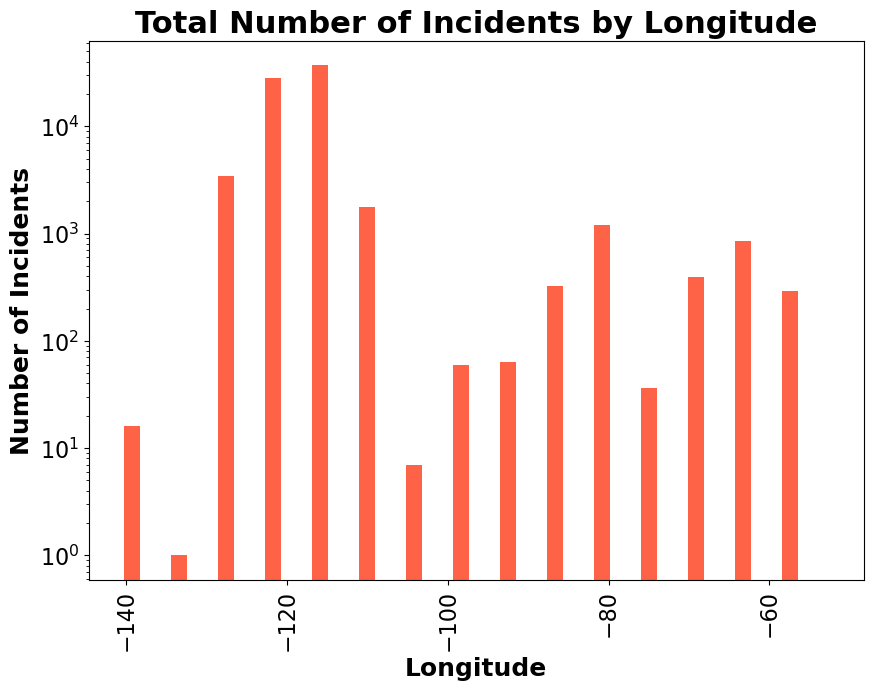

In [29]:
#Note, I've applied a logarithmic y-scale to be able to better view the x values which had very low y values.

plt.figure(figsize=(10,7));
plt.hist(Complete_HWC_Data["Longitude Public"], width=2, bins=15, color = "tomato")
plt.ylabel('Number of Incidents', fontweight="bold", size = 18)
plt.xlabel('Longitude', fontweight="bold", size = 18);
plt.title('Total Number of Incidents by Longitude', fontweight="bold", size = 22)
plt.xticks(size=16, rotation='vertical')
plt.yticks(size=16)
plt.yscale('log')
plt.show()


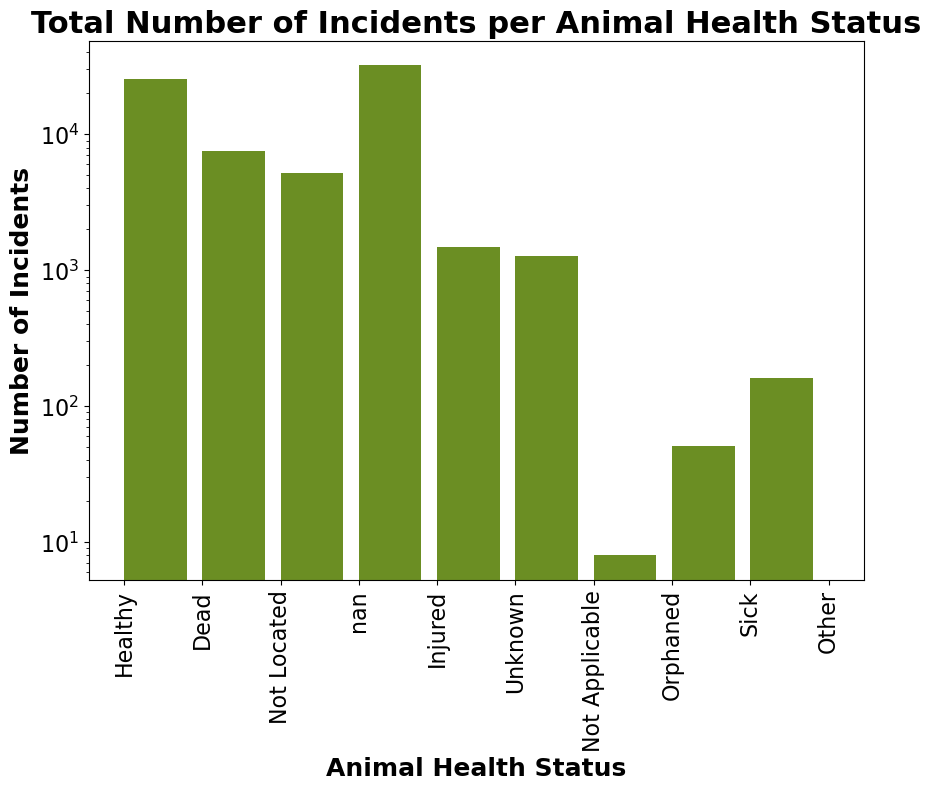

In [30]:
#Note, I've applied a logarithmic y-scale to be able to better view the x values which had very low y values.

plt.figure(figsize=(10,7));
plt.hist(Complete_HWC_Data["Animal Health Status"], width = 0.8, bins = 9, color="olivedrab")
plt.ylabel('Number of Incidents', fontweight="bold", size = 18);
plt.xlabel('Animal Health Status', fontweight="bold", size = 18);
plt.title('Total Number of Incidents per Animal Health Status', fontweight="bold", size = 22)
plt.xticks(size=16, rotation='vertical')
plt.yticks(size=16)
plt.yscale('log')
plt.show()


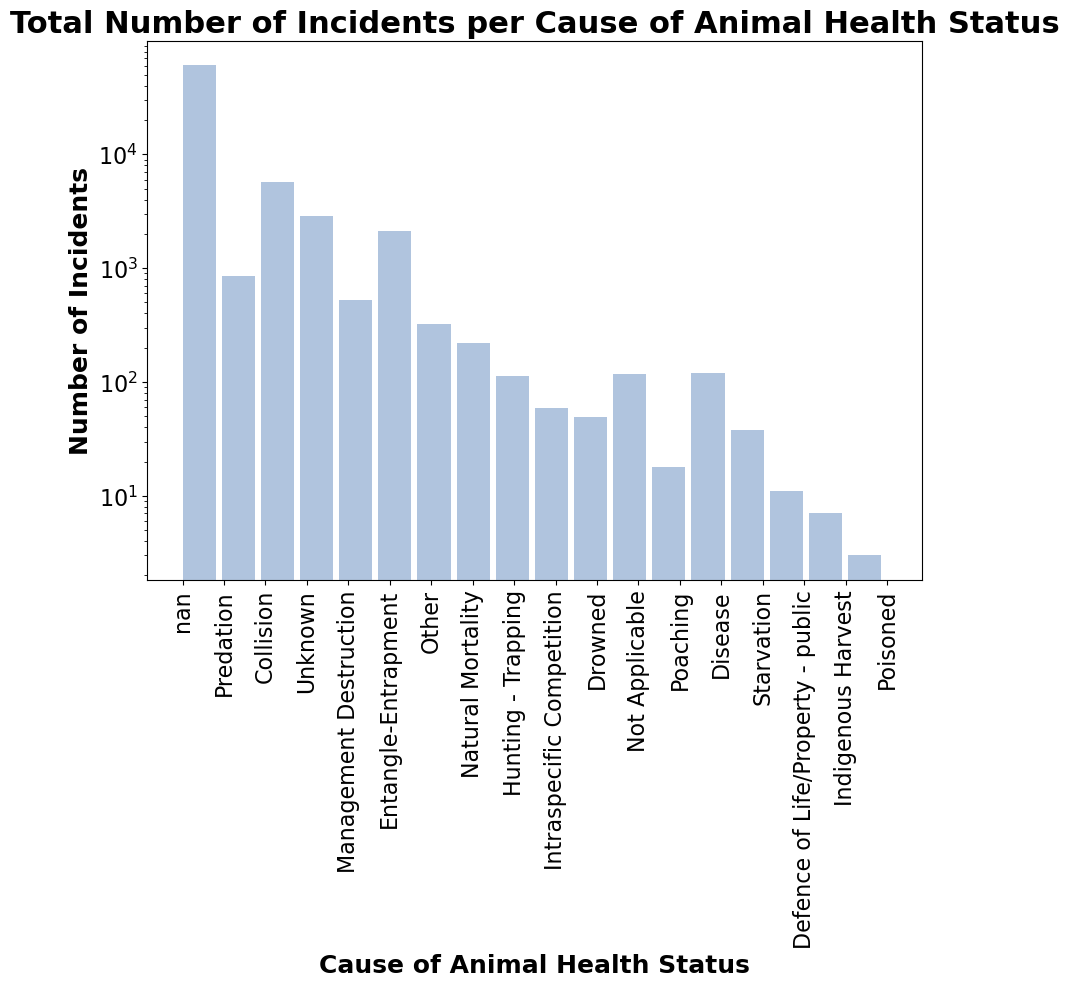

In [36]:
#Note, I've applied a logarithmic y-scale to be able to better view the x values which had very low y values.

plt.figure(figsize=(10,7));
plt.hist(Complete_HWC_Data["Cause of Animal Health Status"], width = 0.8, bins = 18, color="lightsteelblue")
plt.ylabel('Number of Incidents', fontweight="bold", size = 18);
plt.xlabel('Cause of Animal Health Status', fontweight="bold", size = 18);
plt.title('Total Number of Incidents per Cause of Animal Health Status', fontweight="bold", size = 22)
plt.xticks(size=16, rotation='vertical')
plt.yticks(size=16)
plt.yscale('log')
plt.show()


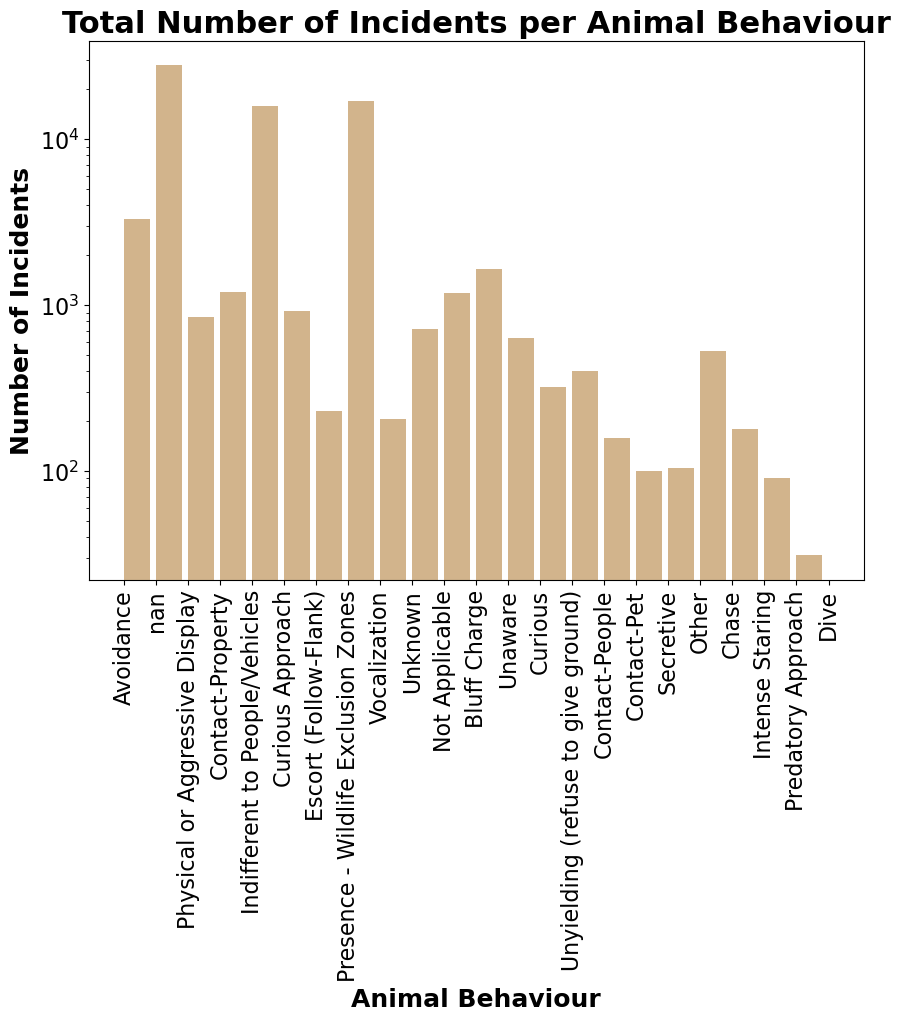

In [37]:
#Note, I've applied a logarithmic y-scale to be able to better view the x values which had very low y values.

plt.figure(figsize=(10,7));
plt.hist(Complete_HWC_Data["Animal Behaviour"], width = 0.8, bins = 22, color="tan")
plt.ylabel('Number of Incidents', fontweight="bold", size = 18);
plt.xlabel('Animal Behaviour', fontweight="bold", size = 18);
plt.title('Total Number of Incidents per Animal Behaviour', fontweight="bold", size = 22)
plt.xticks(size=16, rotation='vertical')
plt.yticks(size=16)
plt.yscale('log')
plt.show()


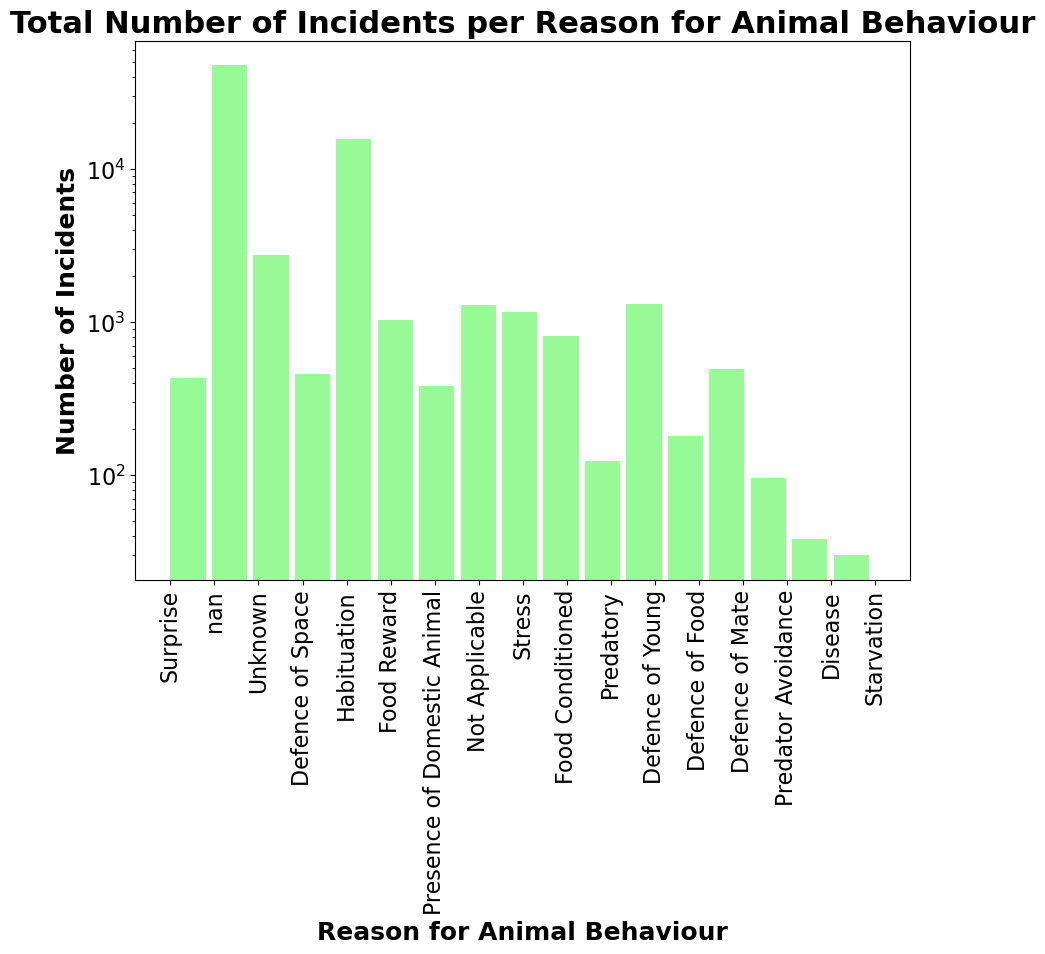

In [39]:
#Note, I've applied a logarithmic y-scale to be able to better view the x values which had very low y values.

plt.figure(figsize=(10,7));
plt.hist(Complete_HWC_Data["Reason for Animal Behaviour"], width = 0.8, bins = 17, color="palegreen")
plt.ylabel('Number of Incidents', fontweight="bold", size = 18);
plt.xlabel('Reason for Animal Behaviour', fontweight="bold", size = 18);
plt.title('Total Number of Incidents per Reason for Animal Behaviour', fontweight="bold", size = 22)
plt.xticks(size=16, rotation='vertical')
plt.yticks(size=16)
plt.yscale('log')
plt.show()


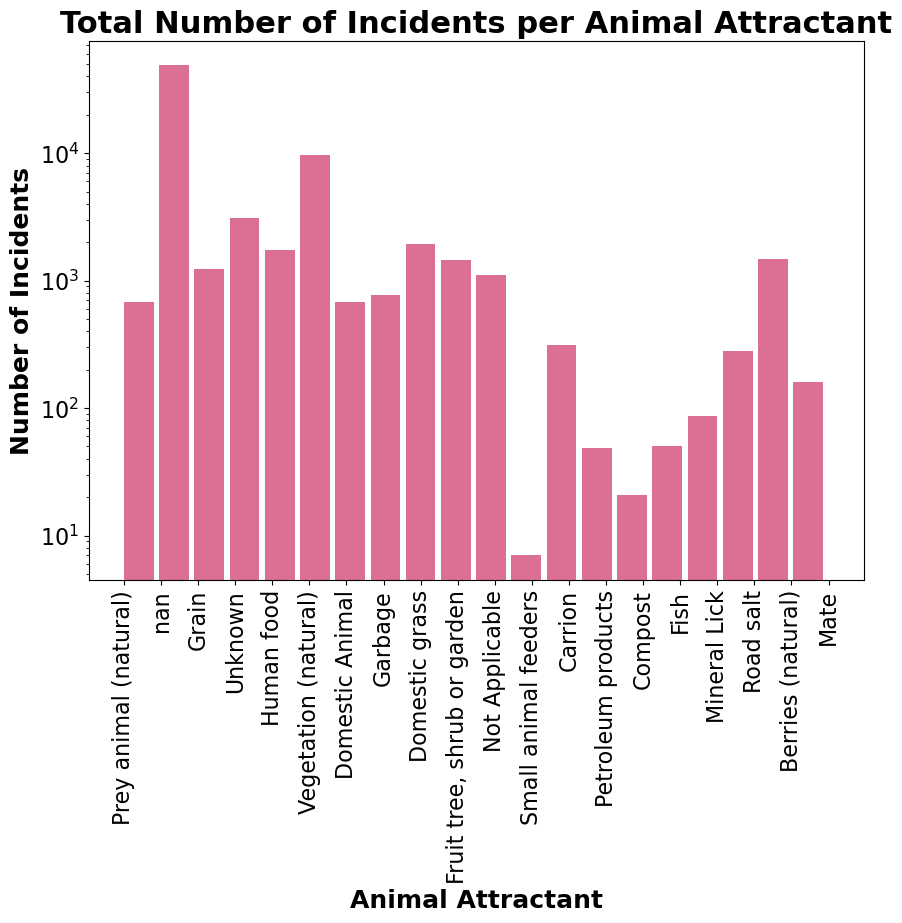

In [40]:
#Note, I've applied a logarithmic y-scale to be able to better view the x values which had very low y values.

plt.figure(figsize=(10,7));
plt.hist(Complete_HWC_Data["Animal Attractant"], width = 0.8, bins = 20, color="palevioletred")
plt.ylabel('Number of Incidents', fontweight="bold", size = 18);
plt.xlabel('Animal Attractant', fontweight="bold", size = 18);
plt.title('Total Number of Incidents per Animal Attractant', fontweight="bold", size = 22)
plt.xticks(size=16, rotation='vertical')
plt.yticks(size=16)
plt.yscale('log')
plt.show()


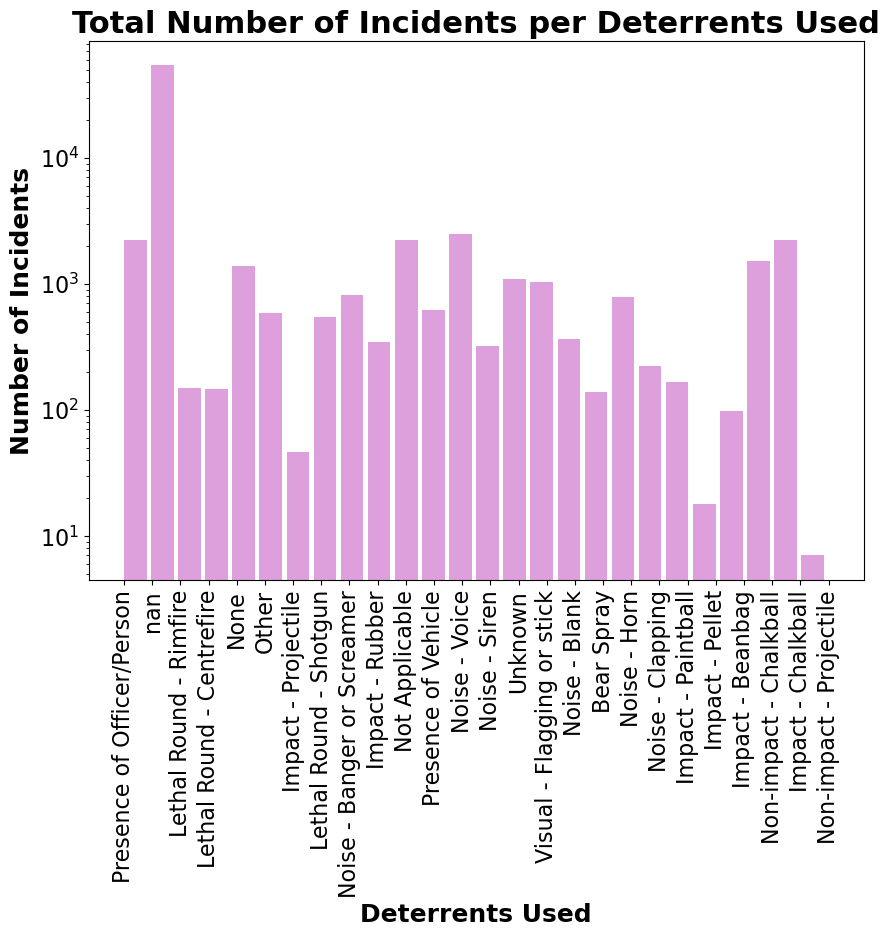

In [41]:
#Note, I've applied a logarithmic y-scale to be able to better view the x values which had very low y values.

plt.figure(figsize=(10,7));
plt.hist(Complete_HWC_Data["Deterrents Used"], width = 0.8, bins = 26, color="plum")
plt.ylabel('Number of Incidents', fontweight="bold", size = 18);
plt.xlabel('Deterrents Used', fontweight="bold", size = 18);
plt.title('Total Number of Incidents per Deterrents Used', fontweight="bold", size = 22)
plt.xticks(size=16, rotation='vertical')
plt.yticks(size=16)
plt.yscale('log')
plt.show()


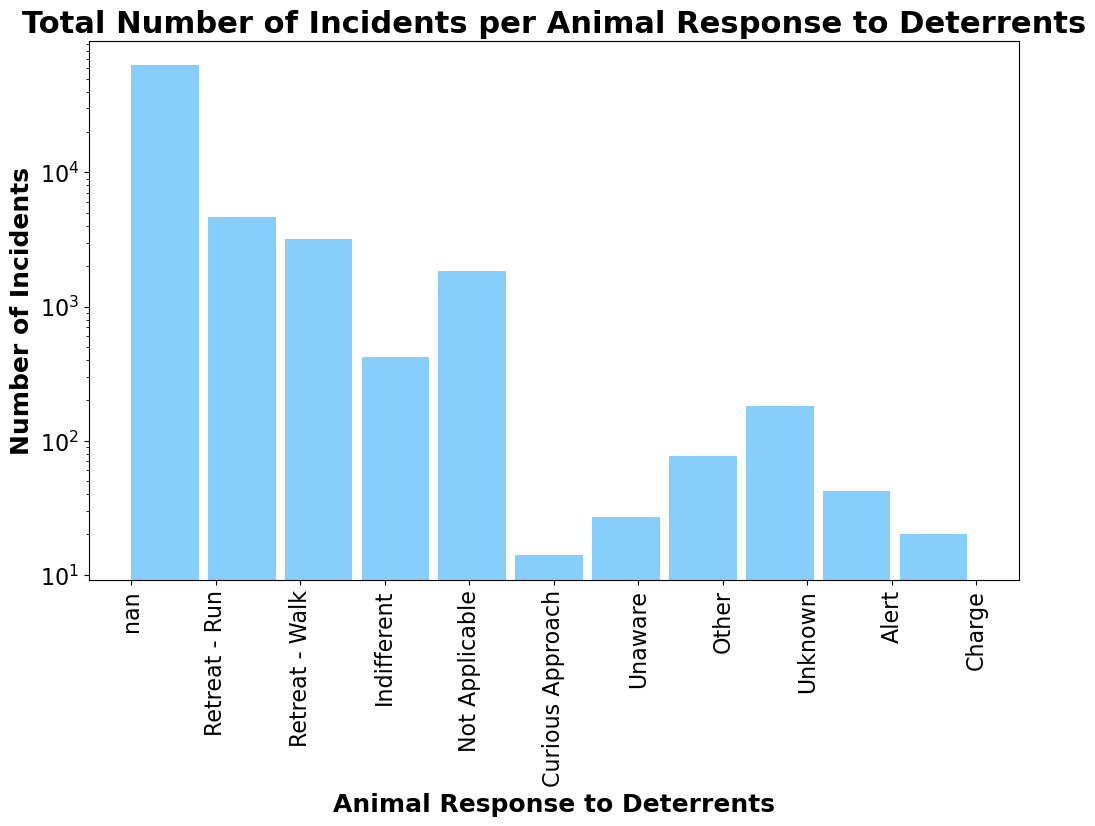

In [42]:
#Note, I've applied a logarithmic y-scale to be able to better view the x values which had very low y values.

plt.figure(figsize=(12,7));
plt.hist(Complete_HWC_Data["Animal Response to Deterrents"], width = 0.8, bins = 11, color="lightskyblue")
plt.ylabel('Number of Incidents', fontweight="bold", size = 18);
plt.xlabel('Animal Response to Deterrents', fontweight="bold", size = 18);
plt.title('Total Number of Incidents per Animal Response to Deterrents', fontweight="bold", size = 22)
plt.xticks(size=16, rotation='vertical')
plt.yticks(size=16)
plt.yscale('log')
plt.show()


**Notes:**

- The "Species Common Variable" proved difficult to plot. There were too many different species types that the plot was not visually readable. I decided to plot out just the species that had frequency counts higher than 100. 

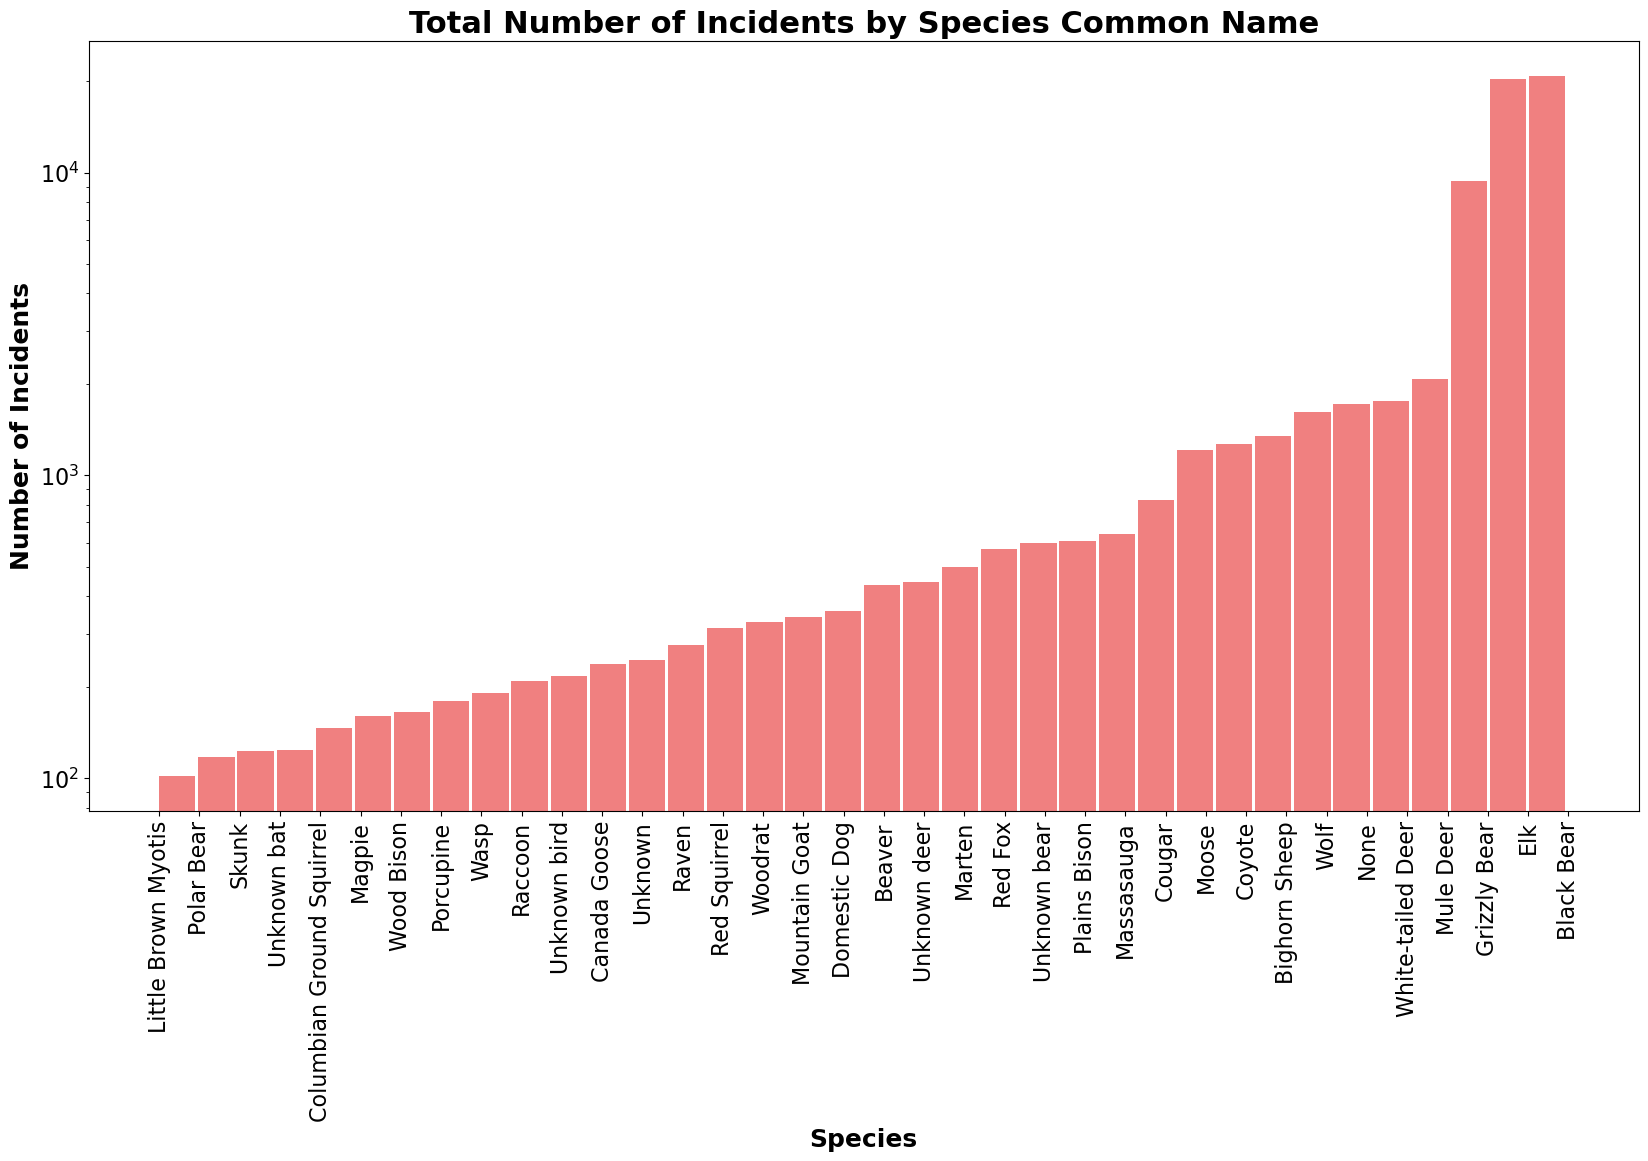

In [43]:
#Note, I've applied a logarithmic y-scale to be able to better view the x values which had very low y values.

plt.figure(figsize=(20,10));
plt.hist(HighSpeciesData["Species Common Name"], width = 0.9, bins = 36, color="lightcoral")
plt.ylabel('Number of Incidents', fontweight="bold", size = 18)
plt.xlabel('Species', fontweight="bold", size = 18);
plt.title('Total Number of Incidents by Species Common Name', fontweight="bold", size = 22)
plt.xticks(size=16, rotation='vertical')
plt.yticks(size=16)
plt.yscale('log')
plt.show()


**Observations from histograms:** 

While it appears as though the “Field Unit” and “Protected Heritage Area” (i.e. Canadian National Park plot) variables overlap, both are interesting to look at. “Protected Heritage Area” directly reflects the 35 Canadian National Parks and “Field Unit” reflects the “name of the administrative unit of Parks Canada Agency that is responsible for management of the incident based on its location” (based on the description provided in the “2. pca-national-human-wildlife-coexistence-header-descriptions.csv” of this data. 

The “Field Unit” histogram shows that the majority of the incidents included in the dataset occurred in the “Banff”, “Jasper”, Field Units with over 20000 incidents, with the “Lake Louise, Yoho, and Kootenay Field Unit” being next highest but with significantly less incidents at just under 10,000. 

Looking at the Canadian National Parks (i.e. “Protected Heritage Area”), “Banff” and “Jasper” National Parks of Canada have the most incidents with over 25000, and the next highest at “Waterton Lakes” with just under 5000. 

Looking at Incident Types, “Human Wildlife Interactions” is the most frequent at near 50,000 and the next highest is “Rescued/Recovered/Found Wildlife” at over 10,000. These will likely be the two Incident Types I focus on in the prediction model and which are of the highest importance in investigating what causes them. 

Looking at both Longitude and Latitude, you can see most incidents are occurring between 50 to 55 Latitude and -135 to -125 Longitude. Referencing those latitude and longitude values on a map, I can see that this mainly indicates the incidents are occurring around British Columbia. I am more interested in the location as indicated by the Park name rather than longitude/latitude values. 

For Animal Health Status, it is obvious that there are several missing values, with the most frequent occurrence of over 30,000 incidents being nan. Next is “Healthy” with around 25,000. I will be interested in looking at the Healthy animals, but also the Dead and Injured health statuses and what factors affect that status. 

Cause of Animal Health Status is not very informative at all with 60,000 missing values of nan. Ignoring the missing values, Collision, and Entrapment are the most prevalent, but with around or under 5000 incidents of each. It would be interesting to look more at the factors involved with those two causes. 

Animal Behaviour has over 25000 nan (missing) values. Ignoring the missing values, there are two values that are most significantly frequent:  “Presence – Wildlife Exclusion Zones” and “Indifferent to People/Vehicles” with over 15000. 

For the Reason for Animal Behaviour, again the most frequent occurrence is the missing values (nan) at over 40,000. Ignoring the missing values, the known value that is significantly the most frequent is “Habituation” with over 15,000. 

Looking at Animal Attractants, missing values (nan) are the most prevalent at nearly 50,000. Ignoring the missing values, the known value that is highest is “Vegetation (natural)”. 

Looking at Deterrents Used, missing values (nan) are the most prevalent. Ignoring the missing values, we can see that Noise – Voice, is the most prevalent at nearly 2500, with Presence of Officer/Person, Not Applicable, and Impact – Chalkball being the next most frequent at over 2000. 

Looking at Species Common Name, the 4 most frequent are Black Bear, Elk, Grizzly Bear, and Mule Deer. Interested to look further at the Incident Type distribution across these 4 species.

### The following section generates various plots that dig deeper into features found interesting in the histograms

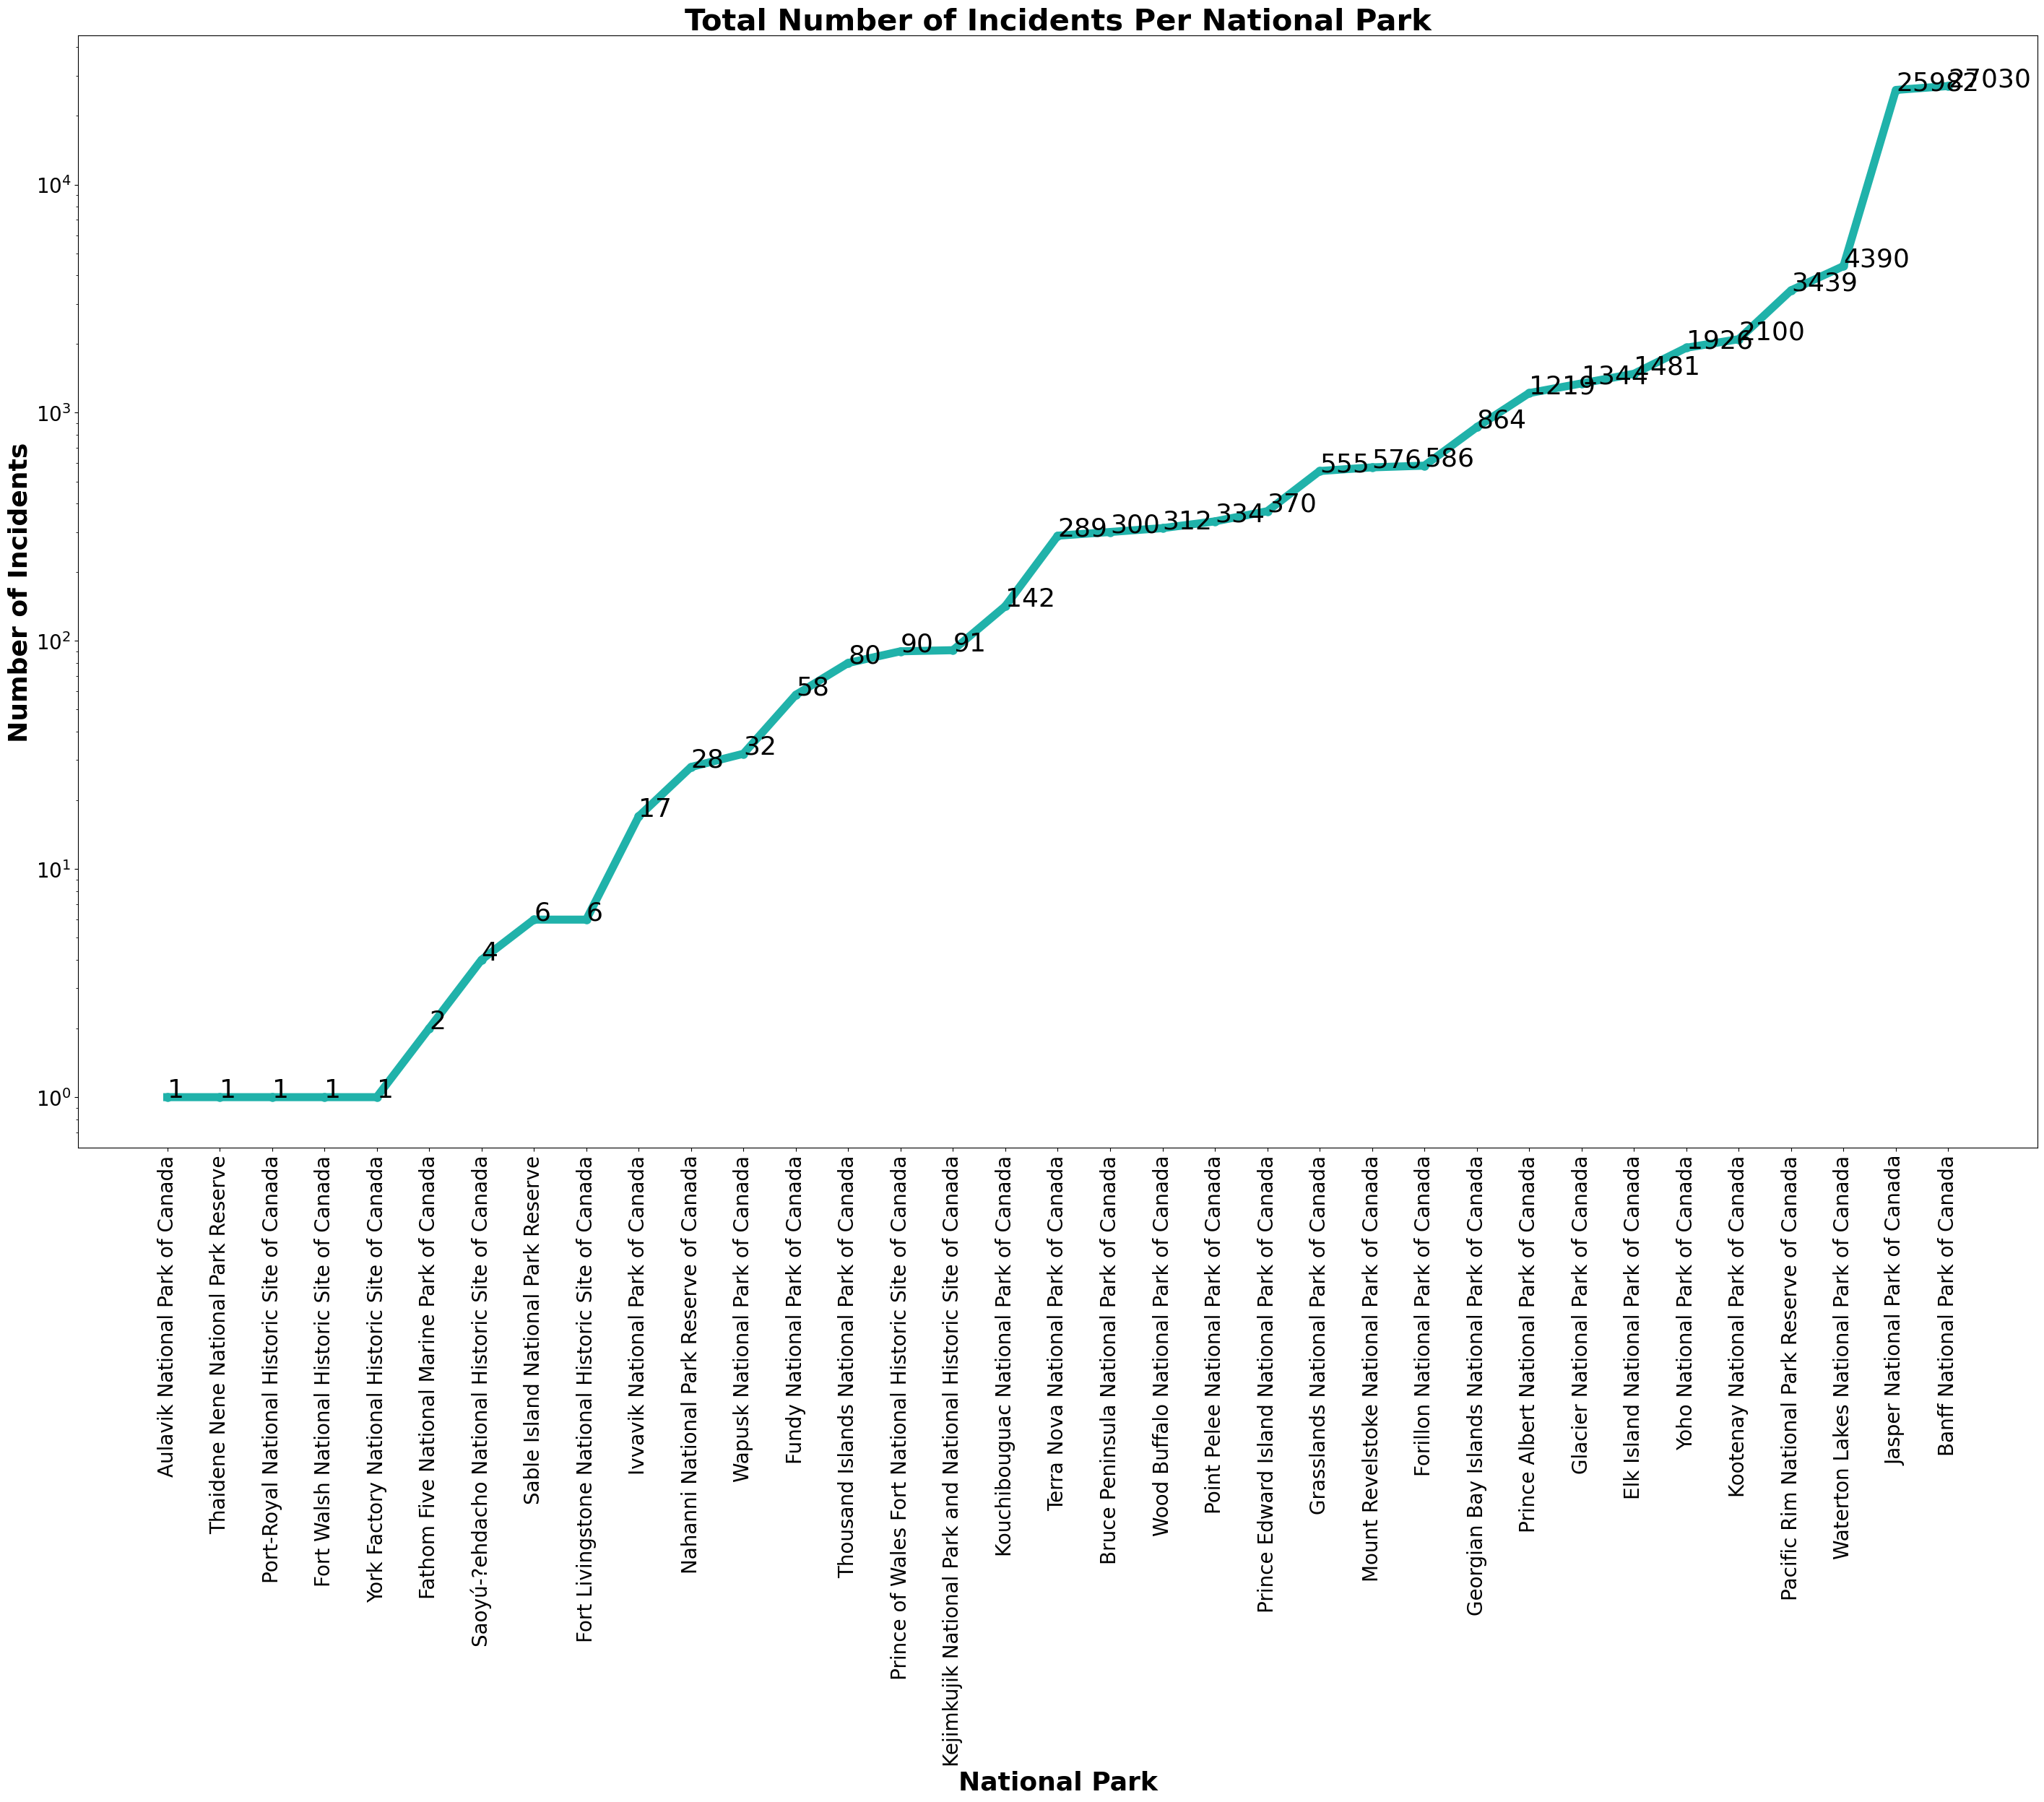

In [44]:
#After the basic histogram above and seeing how few incidents several parks had, 
#I wanted to view the exact number of incidents that occured in each park. 

#Note, I've applied a logarithmic y-scale to be able to better view the x values which had very low y values.

x = IncidentsByPark.index
y = IncidentsByPark["count"]

fig,ax = plt.subplots(figsize=(35,20))
plt.plot(x, y, label=IncidentsByPark.columns, marker="o", mew=3, linewidth=8, color = "lightseagreen")
plt.xlabel("National Park", fontweight="bold", size = 26)
plt.ylabel("Number of Incidents",  fontweight="bold", size = 26)
plt.xticks(size=20, rotation="vertical", label=IncidentsByPark["count"])
plt.yticks(size=20)
plt.yscale('log')
plt.title("Total Number of Incidents Per National Park", fontweight="bold", size = 30)
for index in range(len(x)):
  ax.text(x[index], y[index], y[index], size=26)
plt.show()


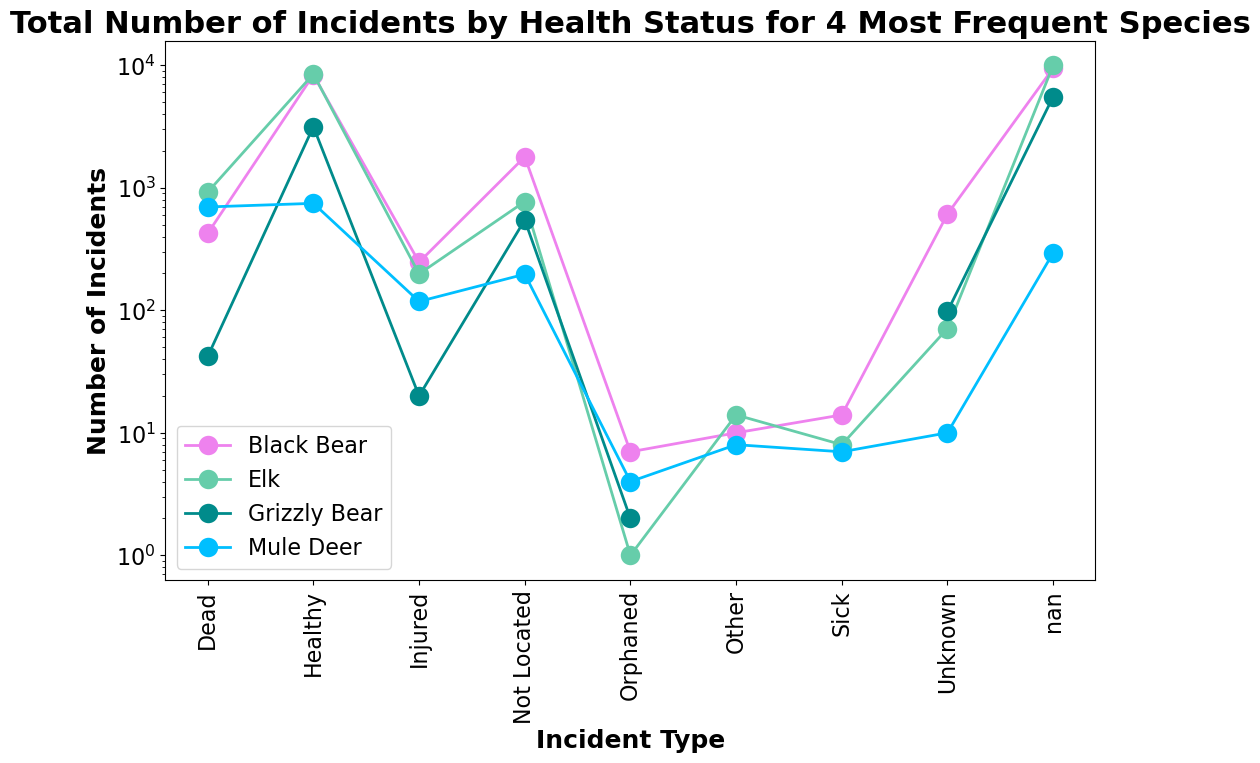

In [47]:
#Note, I've applied a logarithmic y-scale to be able to better view the x values which had very low y values.

plt.figure(figsize=(12,7));
plt.plot(HealthBySpecies["Black Bear"], label="Black Bear", marker="o", mew=8, linewidth=2, color = "violet")
plt.plot(HealthBySpecies["Elk"], label="Elk", marker="o", mew=8, linewidth=2)
plt.plot(HealthBySpecies["Grizzly Bear"], label="Grizzly Bear", marker="o", mew=8, linewidth=2)
plt.plot(HealthBySpecies["Mule Deer"], label="Mule Deer", marker="o", mew=8, linewidth=2)
plt.ylabel('Number of Incidents', fontweight="bold", size = 18)
plt.xlabel('Incident Type', fontweight="bold", size = 18);
plt.title('Total Number of Incidents by Health Status for 4 Most Frequent Species', fontweight="bold", size = 22)
plt.xticks(size=16, rotation='vertical')
plt.yticks(size=16)
plt.yscale('log')
plt.legend(prop={"size":16});
plt.show()



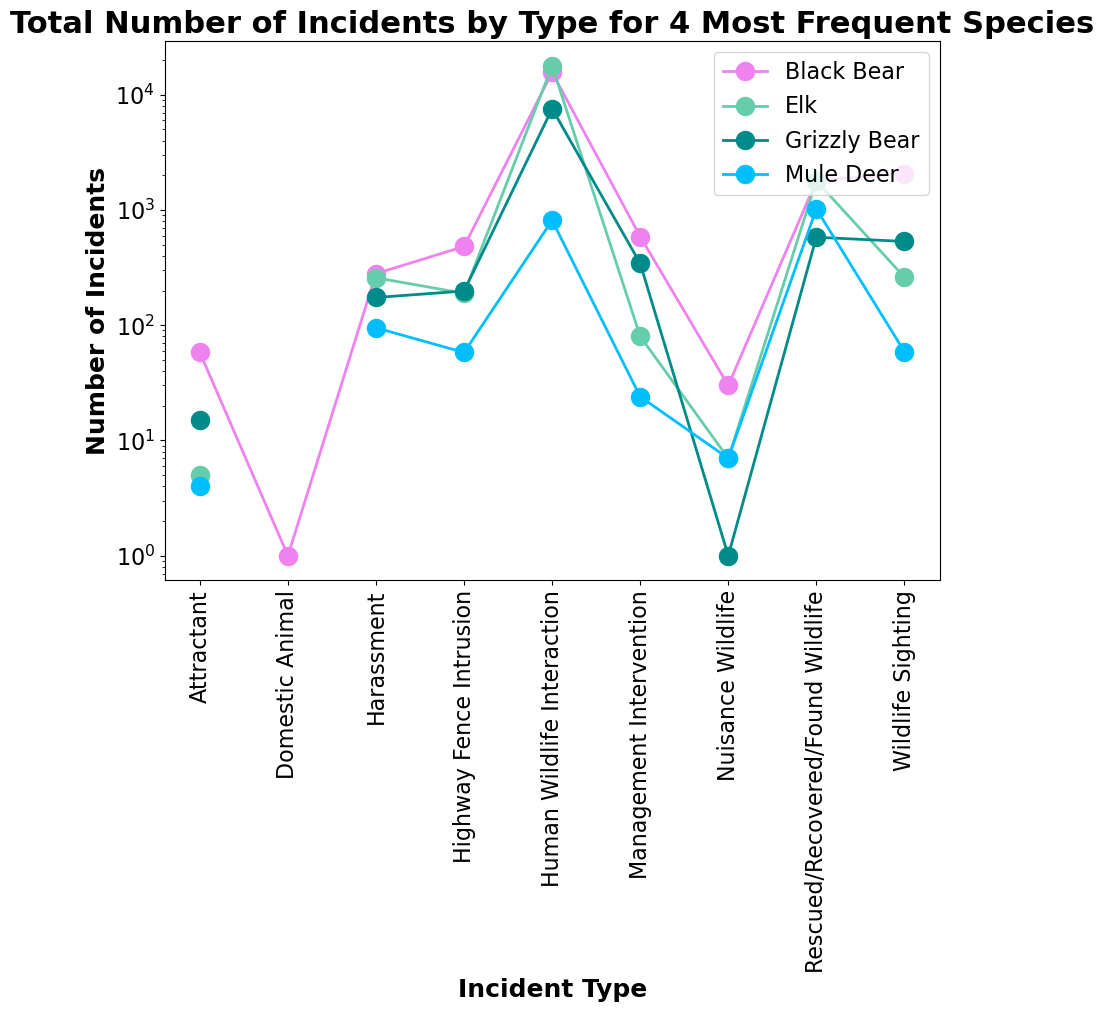

In [105]:
#Note, I've applied a logarithmic y-scale to be able to better view the x values which had very low y values.

plt.figure(figsize=(10,7));
plt.plot(IncBySpecies["Black Bear"], label="Black Bear", marker="o", mew=8, linewidth=2, color="violet")
plt.plot(IncBySpecies["Elk"], label="Elk", marker="o", mew=8, linewidth=2)
plt.plot(IncBySpecies["Grizzly Bear"], label="Grizzly Bear", marker="o", mew=8, linewidth=2)
plt.plot(IncBySpecies["Mule Deer"], label="Mule Deer", marker="o", mew=8, linewidth=2)
plt.ylabel('Number of Incidents', fontweight="bold", size = 18)
plt.xlabel('Incident Type', fontweight="bold", size = 18);
plt.title('Total Number of Incidents by Type for 4 Most Frequent Species', fontweight="bold", size = 22)
plt.xticks(size=16, rotation='vertical')
plt.yticks(size=16)
plt.yscale('log')
plt.legend(loc="upper right", prop={"size":16});
plt.show()


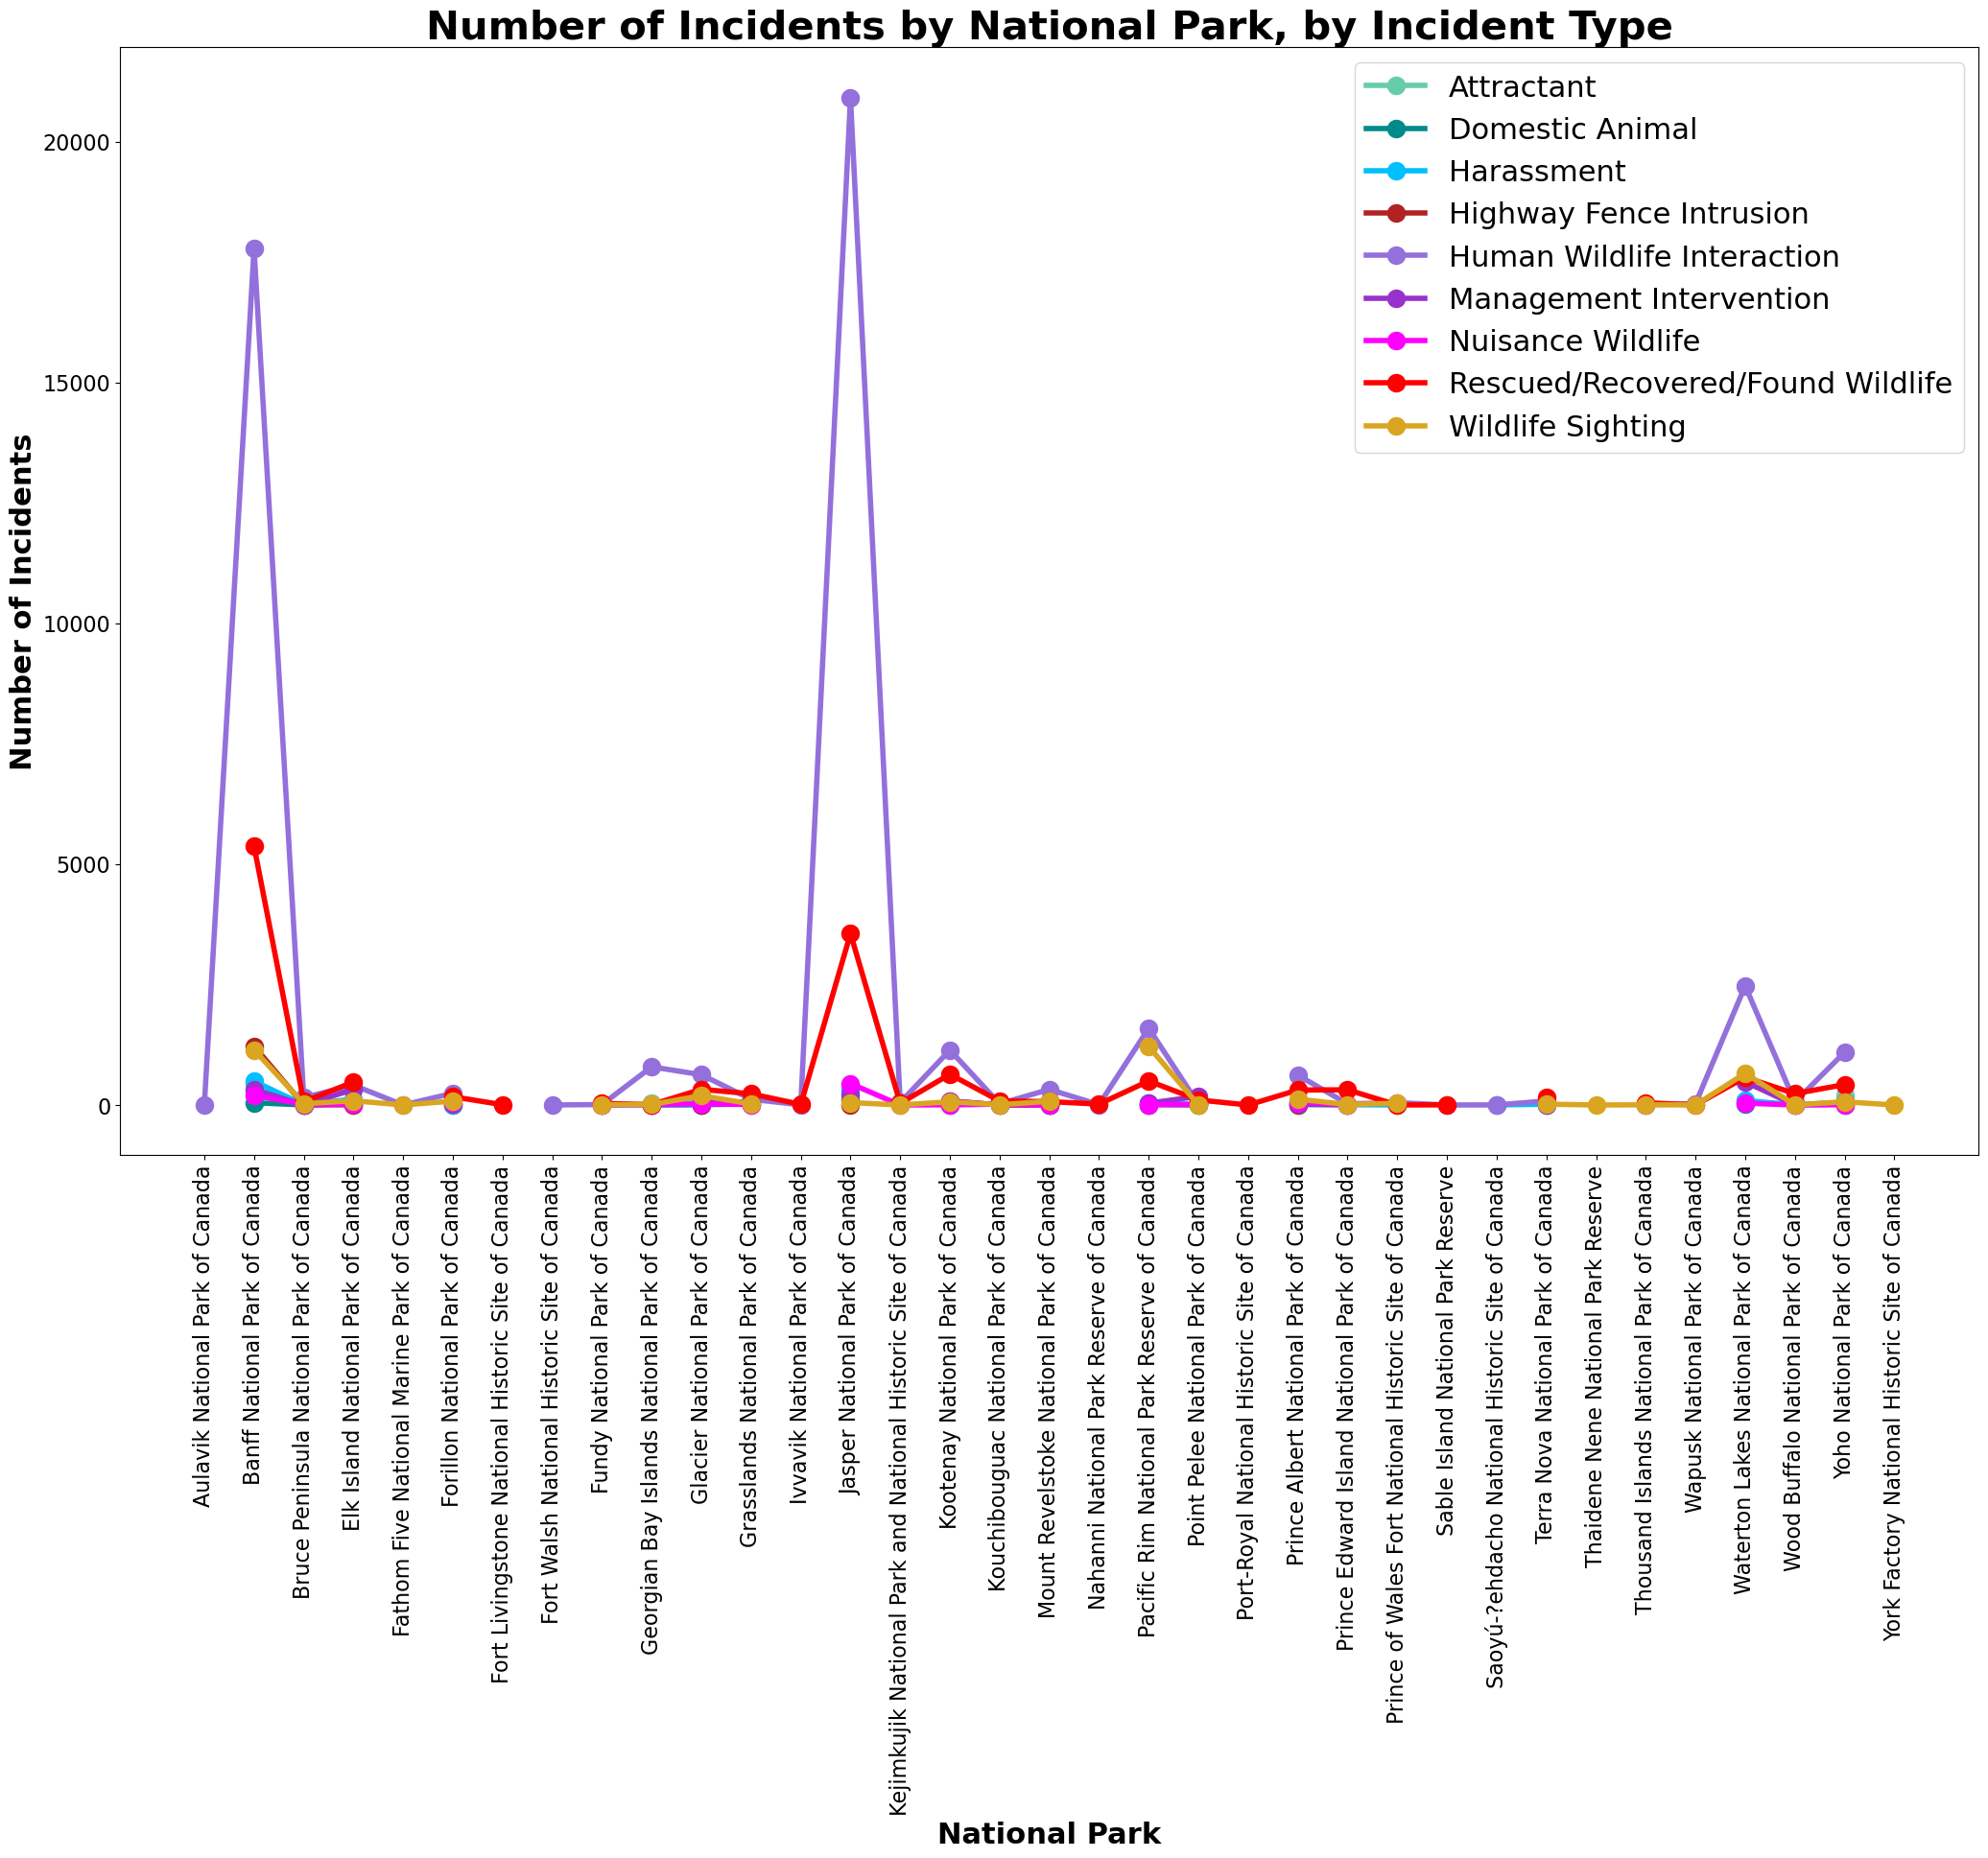

<Figure size 640x2000 with 0 Axes>

In [58]:
#Modifying color cycler so that the colors are not repeating across different parks.
plot_colors = ["mediumaquamarine", "darkcyan", "deepskyblue", "firebrick", "mediumpurple", "darkorchid", "magenta", "red", "goldenrod", "sienna", "saddlebrown", "peru", "darkorange", "tan", "goldenrod", "gold", "darkkhaki", "olive", "yellowgreen", "olivedrab", "chartreuse", "darkseagreen", "palegreen", "forestgreen", "limegreen", "mediumspringgreen"]
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plot_colors)


plt.figure(figsize=(25,15));
plt.plot(IncidentsByTypeByPark, label=IncidentsByTypeByPark.columns, marker="o", mew=8, linewidth=4);
plt.xlabel("National Park", fontweight="bold", size = 22);
plt.ylabel("Number of Incidents", fontweight="bold", size = 22);
plt.xticks(size=16, rotation="vertical")
plt.yticks(size=16)
plt.legend(loc="upper right", prop={"size":22});
plt.title("Number of Incidents by National Park, by Incident Type", fontweight="bold", size = 30);
plt.figure().set_figheight(20);
plt.show();

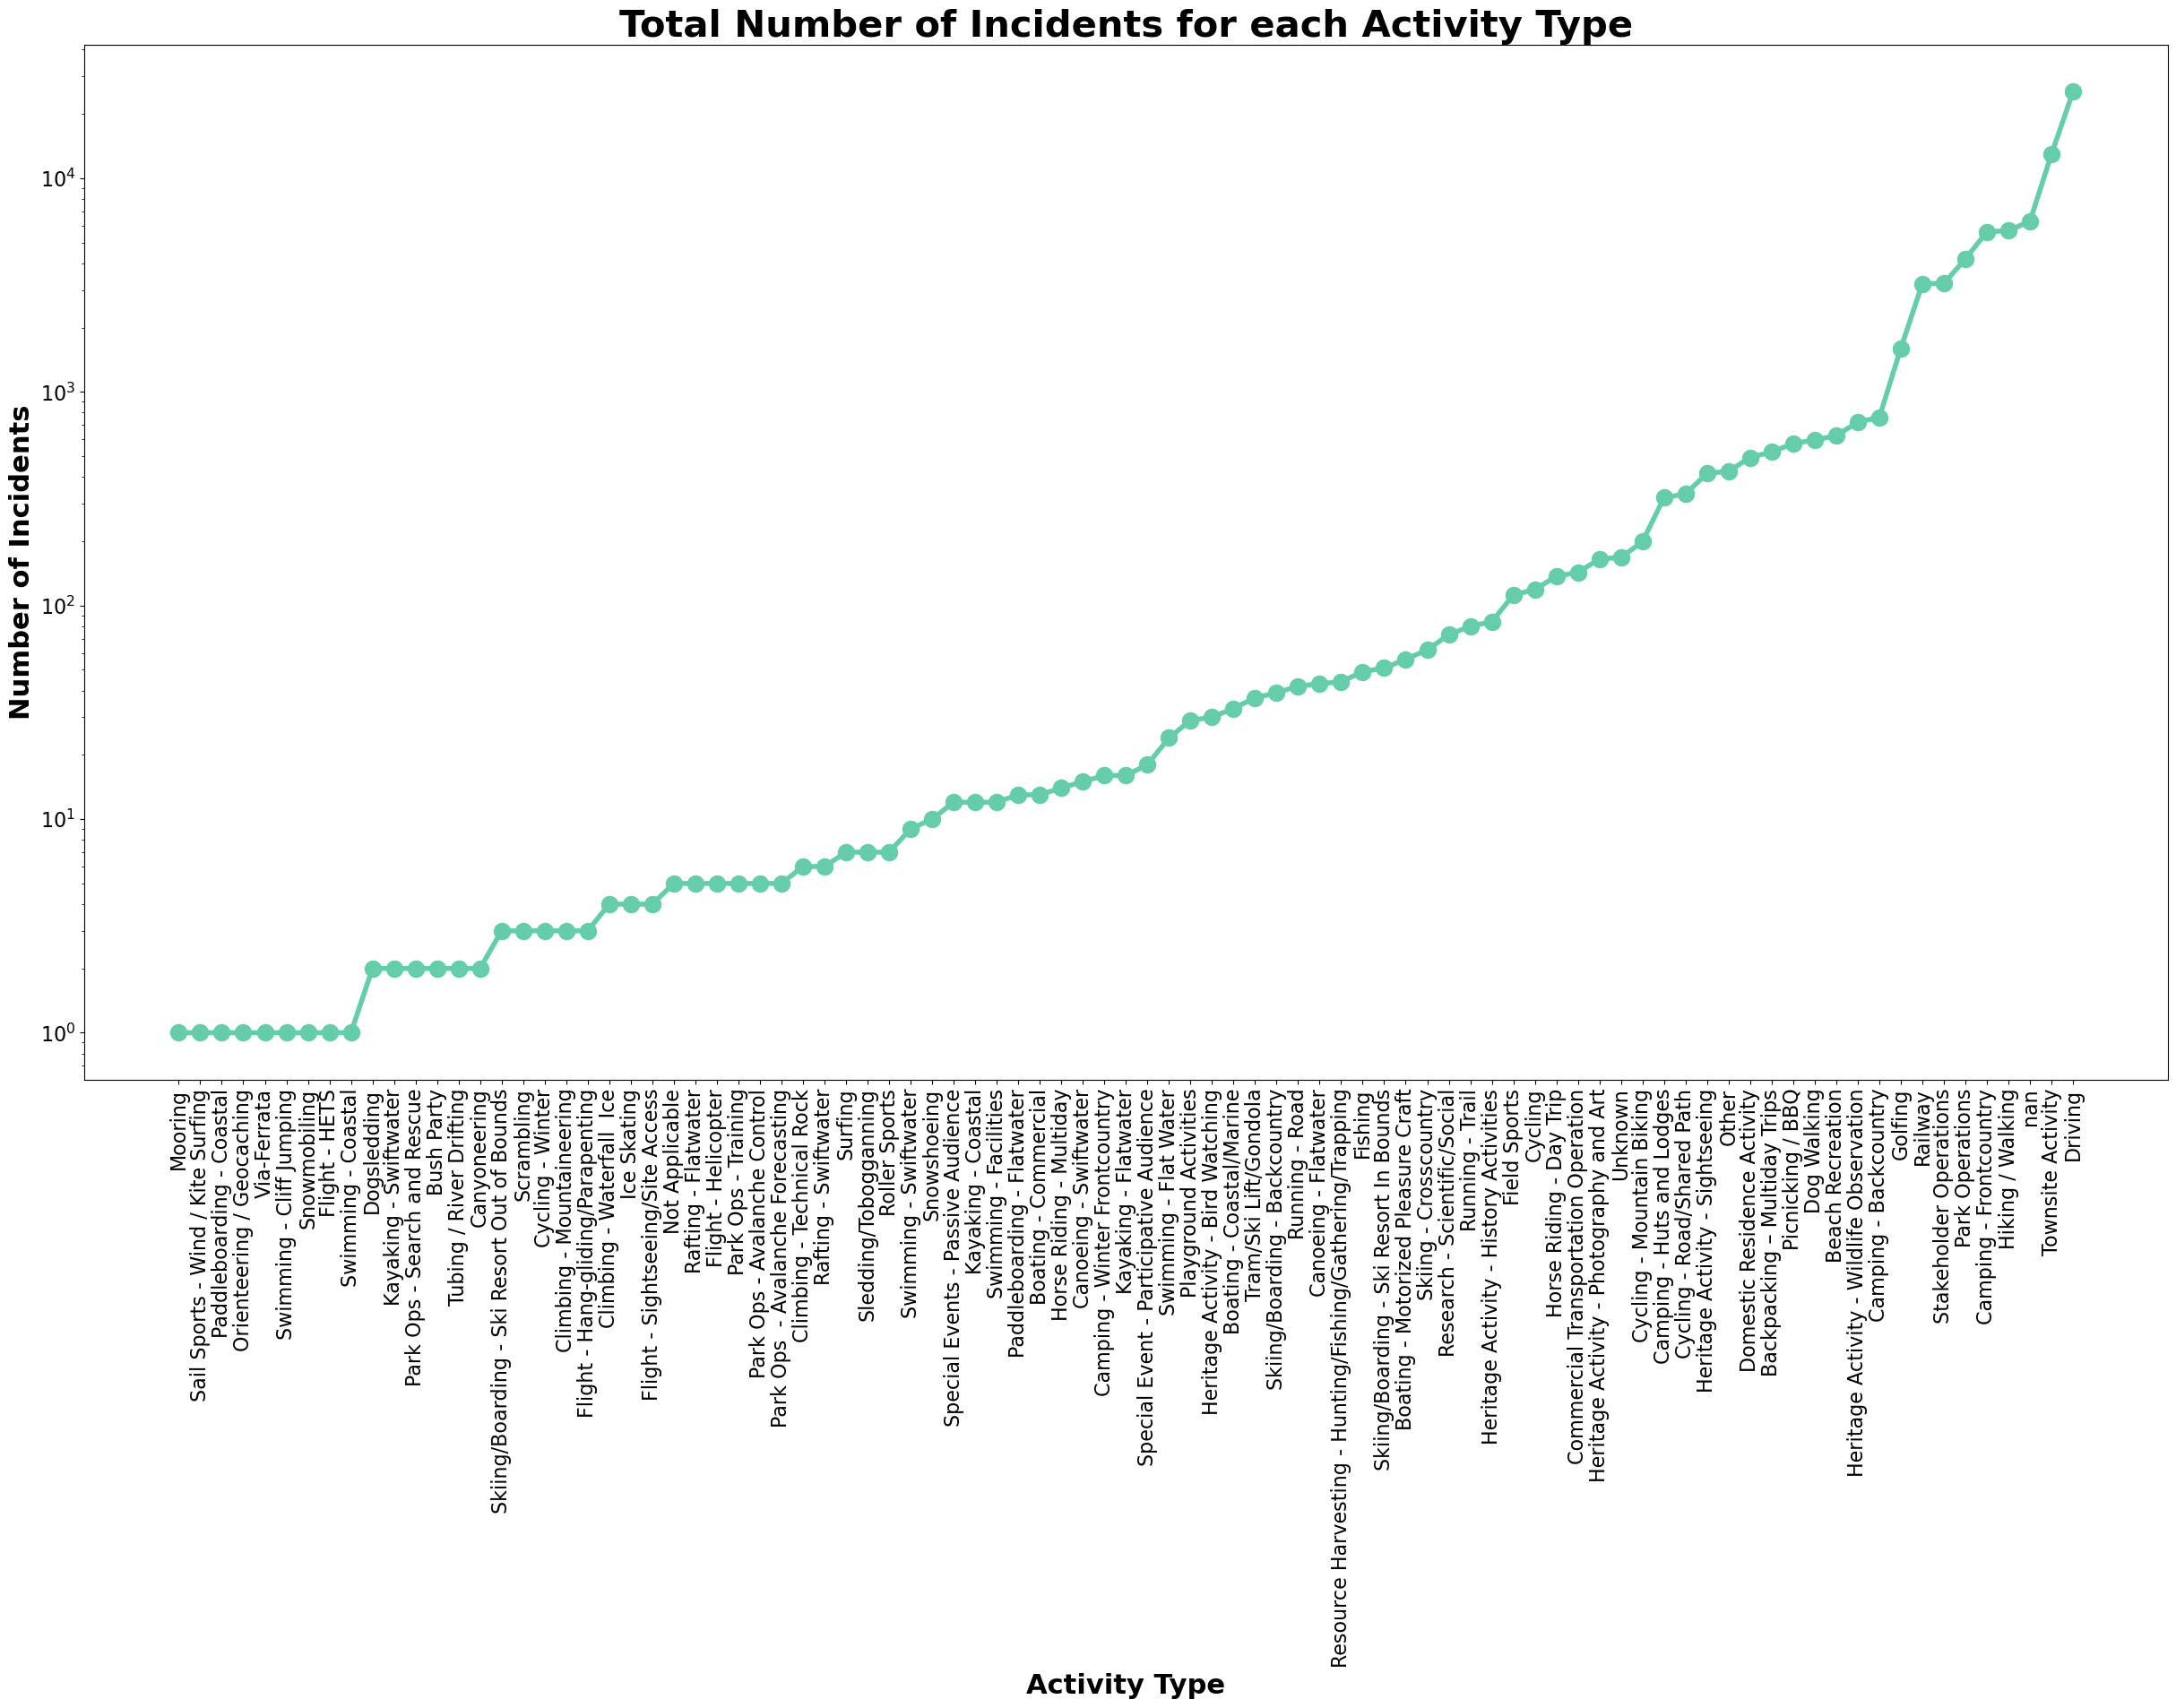

<Figure size 640x2000 with 0 Axes>

In [133]:
ActivityTypes=Complete_HWC_Data[Complete_HWC_Data.columns[20:109]]
ActivityTypes=ActivityTypes.sum()
#ActivityTypesDF = ActivityTypes.to_frame()
ActivityTypesDF = pd.DataFrame({'Activity Type':ActivityTypes.index, 'Sum':ActivityTypes.values})
ActivityTypesDF['Activity Type'] = ActivityTypesDF['Activity Type'].str.replace('Activity Type_', '')
ActivityTypesDF = ActivityTypesDF.pivot_table("Sum", "Activity Type")
ActivityTypesDF = ActivityTypesDF['Sum'].sort_values()

#Note, I've applied a logarithmic y-scale to be able to better view the x values which had very low y values.

plt.figure(figsize=(30,15));
plt.plot(ActivityTypesDF, marker="o", mew=8, linewidth=4);
plt.xlabel("Activity Type", fontweight="bold", size = 22);
plt.ylabel("Number of Incidents", fontweight="bold", size = 22);
plt.xticks(size=16, rotation="vertical")
plt.yticks(size=16)
plt.yscale('log')
plt.title("Total Number of Incidents for each Activity Type", fontweight="bold", size = 30);
plt.figure().set_figheight(20);
plt.show();

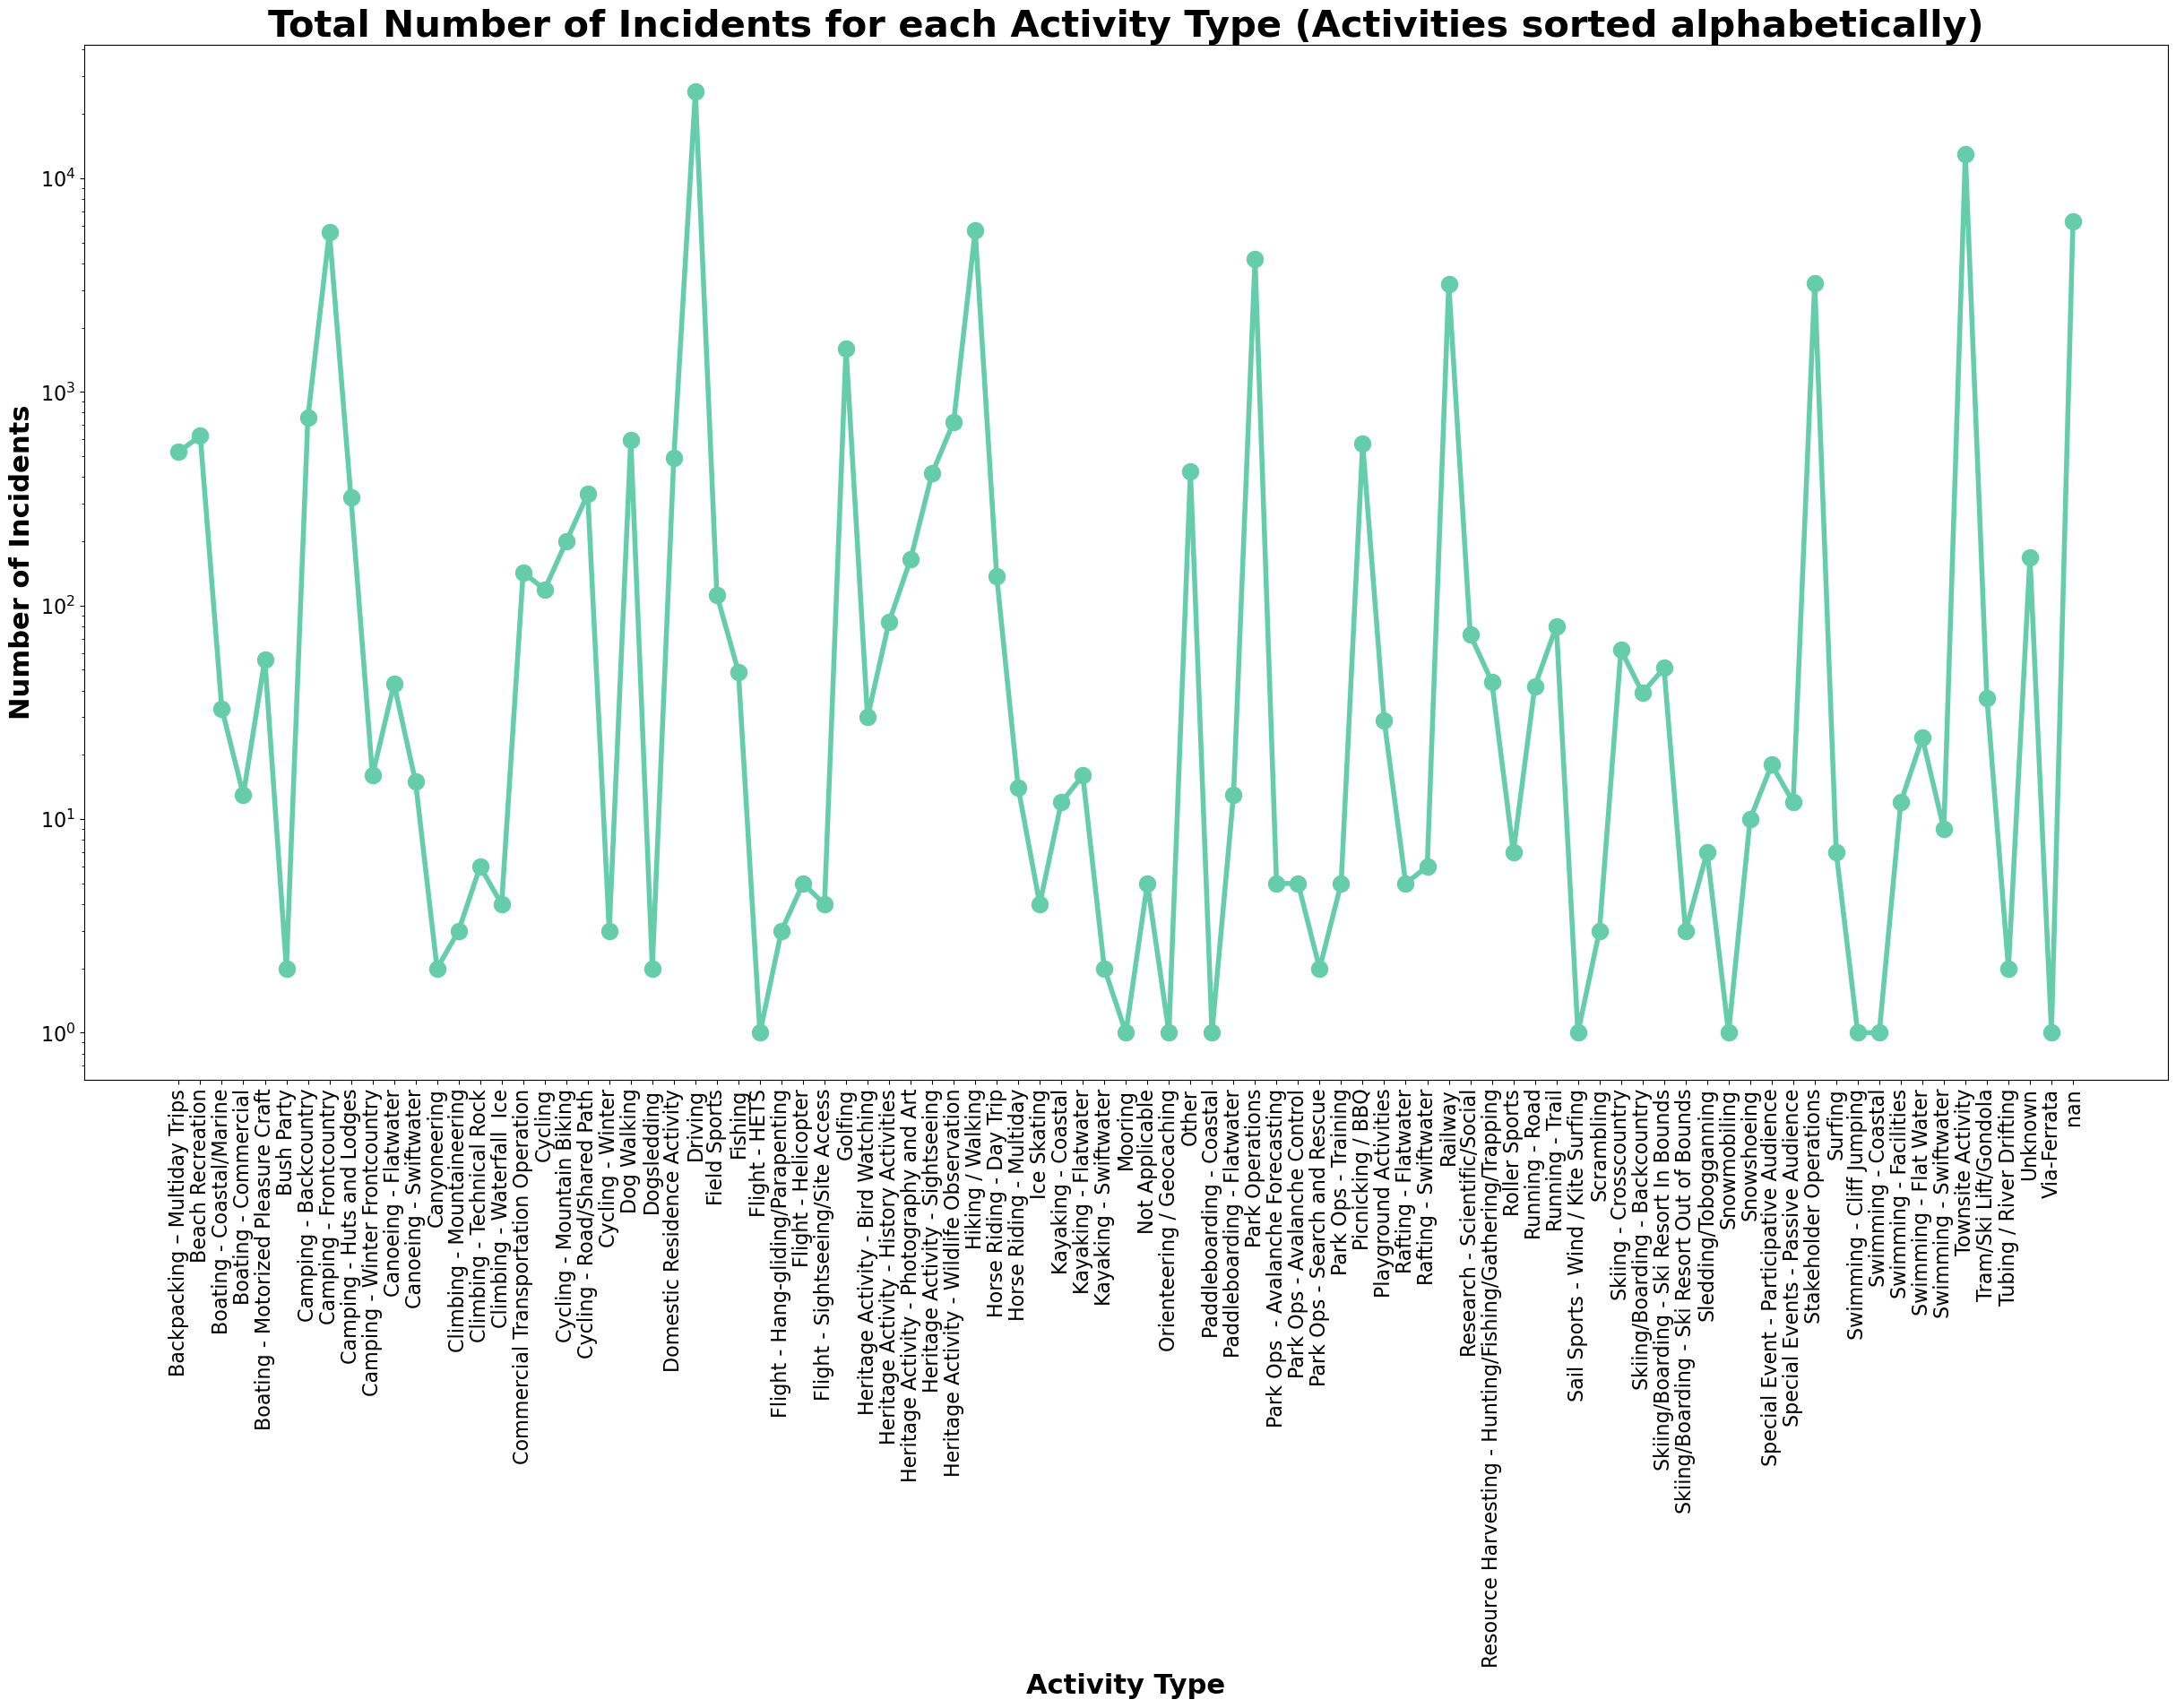

<Figure size 640x2000 with 0 Axes>

In [131]:
ActivityTypes=Complete_HWC_Data[Complete_HWC_Data.columns[20:109]]
ActivityTypes=ActivityTypes.sum()
#ActivityTypesDF = ActivityTypes.to_frame()
ActivityTypesDF = pd.DataFrame({'Activity Type':ActivityTypes.index, 'Sum':ActivityTypes.values})
ActivityTypesDF['Activity Type'] = ActivityTypesDF['Activity Type'].str.replace('Activity Type_', '')
ActivityTypesDF['Activity Type'] = ActivityTypesDF['Activity Type'].sort_values()
ActivityTypesDF = ActivityTypesDF.pivot_table("Sum", "Activity Type")

#Note, I've applied a logarithmic y-scale to be able to better view the x values which had very low y values.

plt.figure(figsize=(30,15));
plt.plot(ActivityTypesDF, marker="o", mew=8, linewidth=4);
plt.xlabel("Activity Type", fontweight="bold", size = 22);
plt.ylabel("Number of Incidents", fontweight="bold", size = 22);
plt.xticks(size=16, rotation="vertical")
plt.yticks(size=16)
plt.yscale('log')
plt.title("Total Number of Incidents for each Activity Type (Activities sorted alphabetically)", fontweight="bold", size = 30);
plt.figure().set_figheight(20);
plt.show();

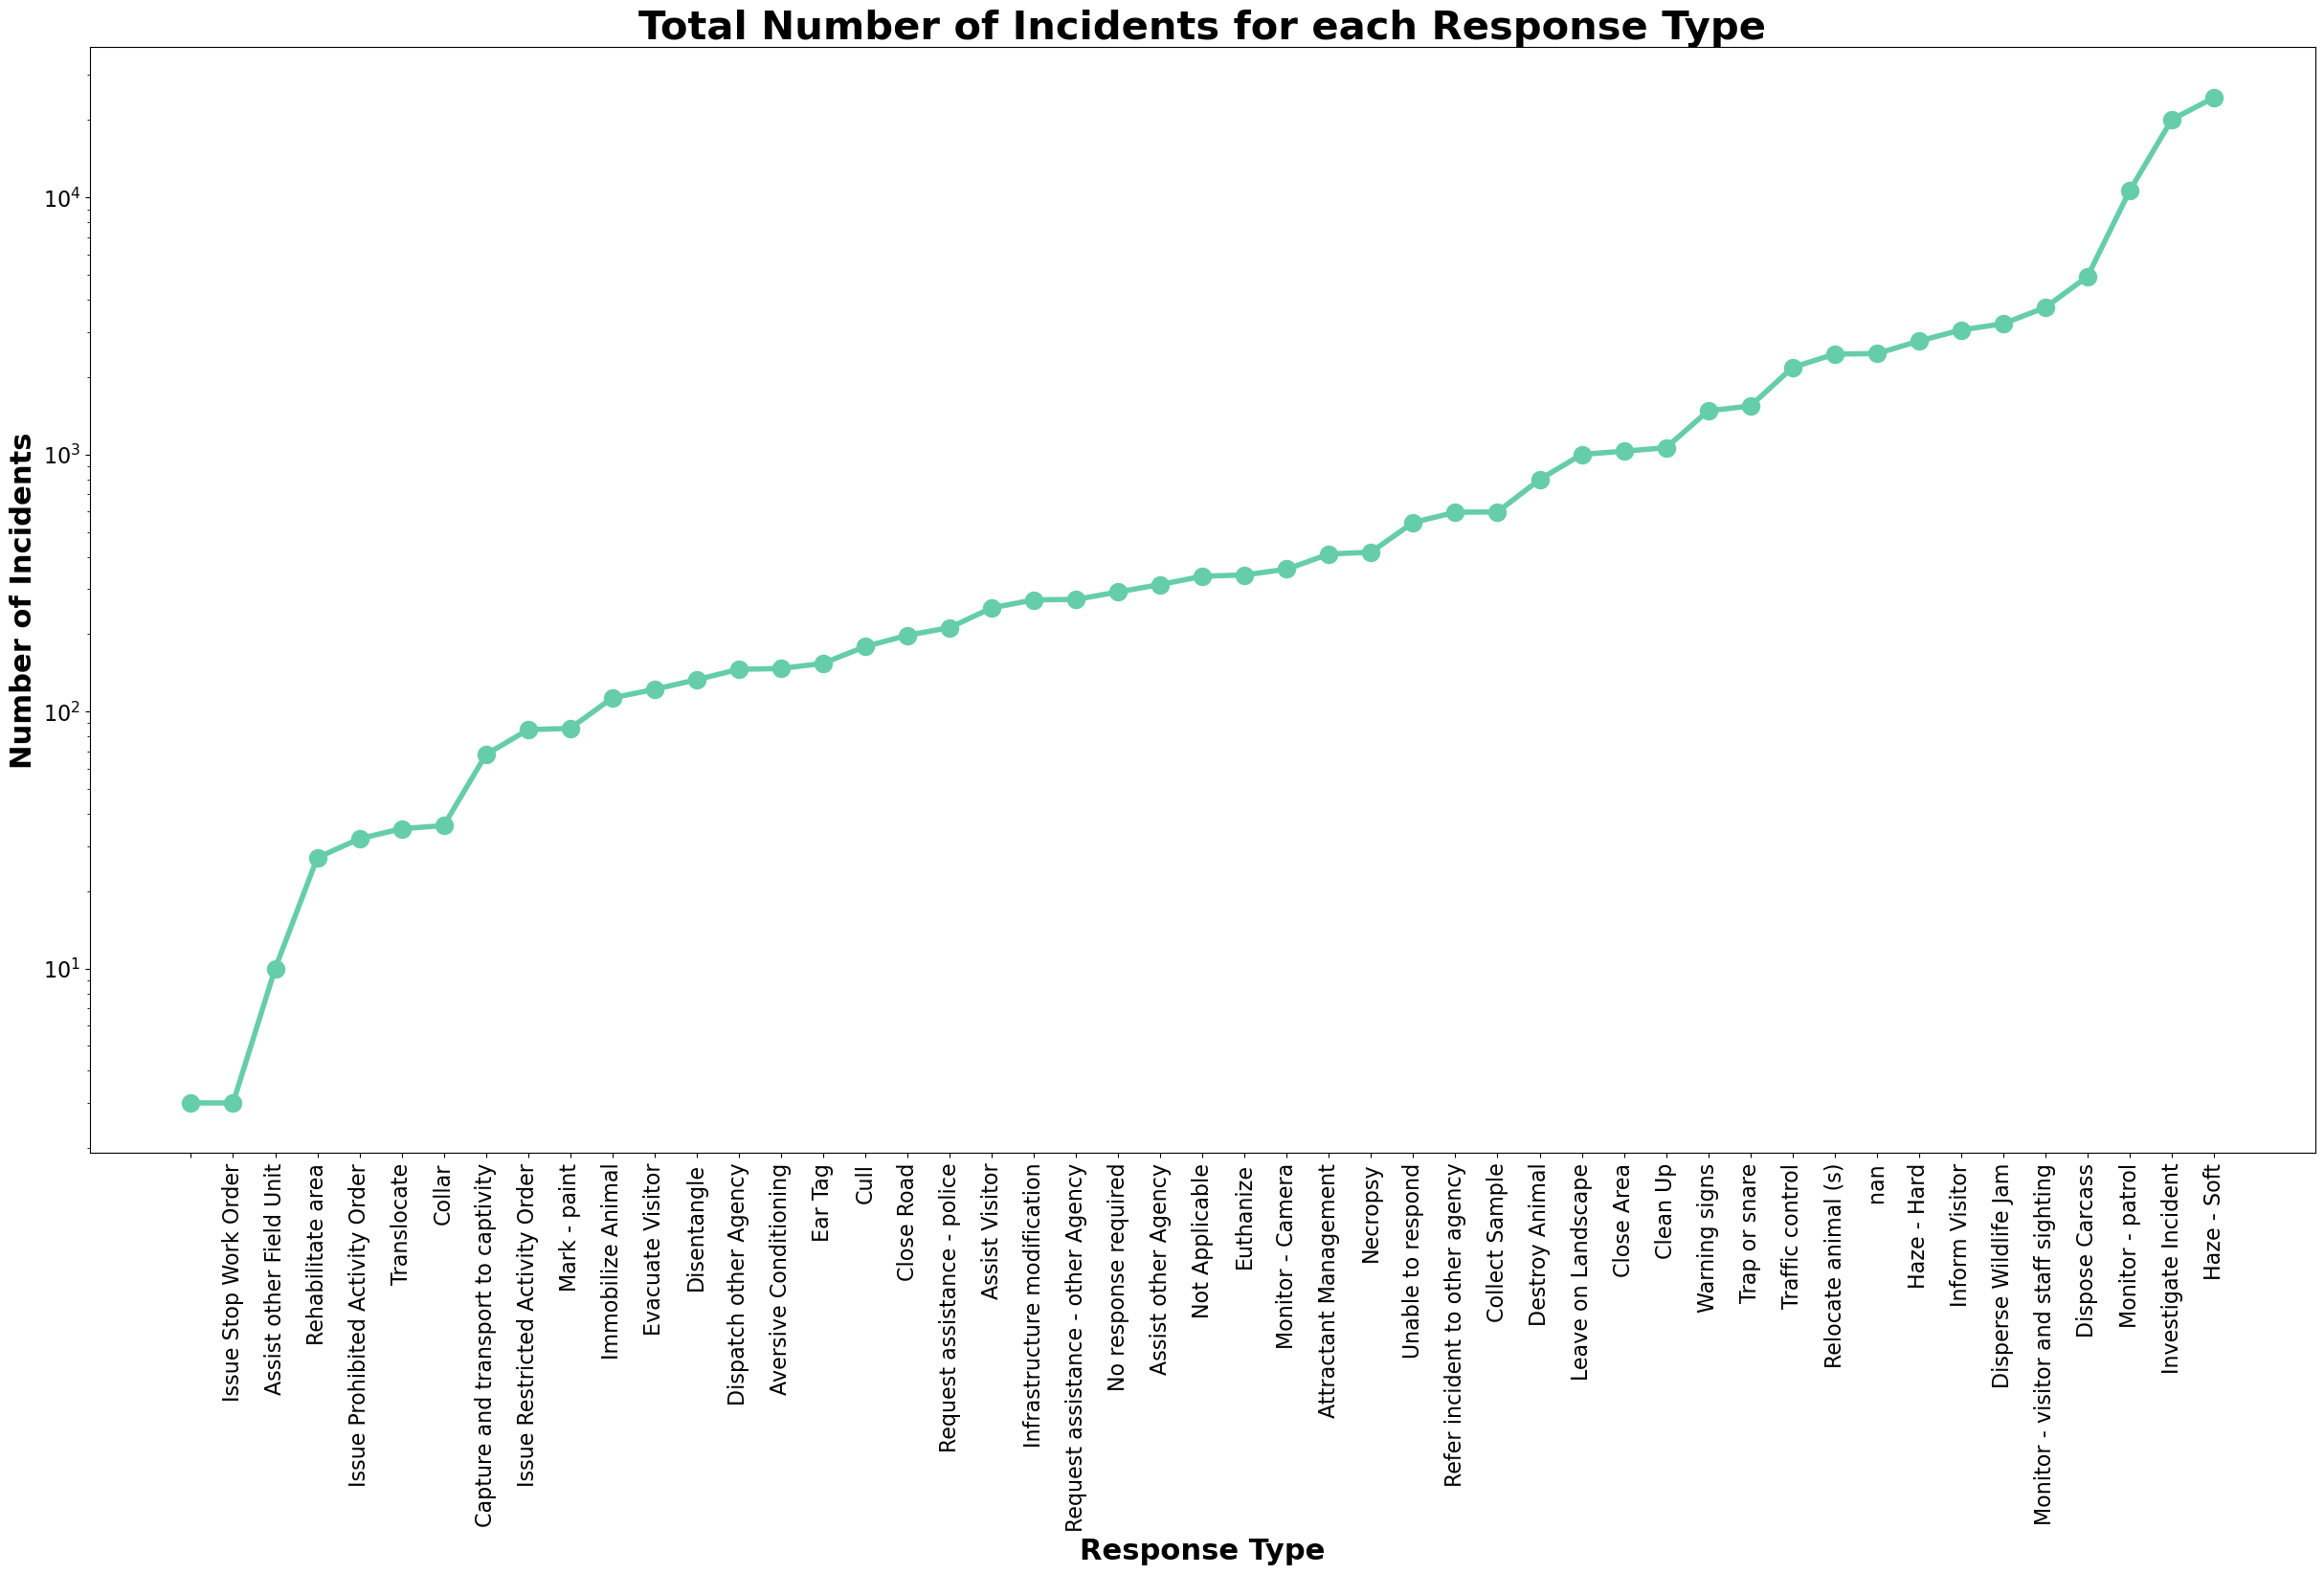

<Figure size 640x2000 with 0 Axes>

In [135]:
ResponseTypes = Complete_HWC_Data[Complete_HWC_Data.columns[109:158]]
ResponseTypes=ResponseTypes.sum()
#ActivityTypesDF = ActivityTypes.to_frame()
ResponseTypesDF = pd.DataFrame({'Response Type':ResponseTypes.index, 'Sum':ResponseTypes.values})
ResponseTypesDF['Response Type'] = ResponseTypesDF['Response Type'].str.replace('Response Type_', '')
ResponseTypesDF = ResponseTypesDF.pivot_table("Sum", "Response Type")
ResponseTypesDF = ResponseTypesDF['Sum'].sort_values()

#Note, I've applied a logarithmic y-scale to be able to better view the x values which had very low y values.

plt.figure(figsize=(30,15));
plt.plot(ResponseTypesDF, marker="o", mew=8, linewidth=4);
plt.xlabel("Response Type", fontweight="bold", size = 22);
plt.ylabel("Number of Incidents", fontweight="bold", size = 22);
plt.xticks(size=16, rotation="vertical")
plt.yticks(size=16)
plt.yscale('log')
plt.title("Total Number of Incidents for each Response Type", fontweight="bold", size = 30);
plt.figure().set_figheight(20);
plt.show();

### The following section generates time series plots looking at patterns in Incident Type and/or Frequency and location and time of year. 

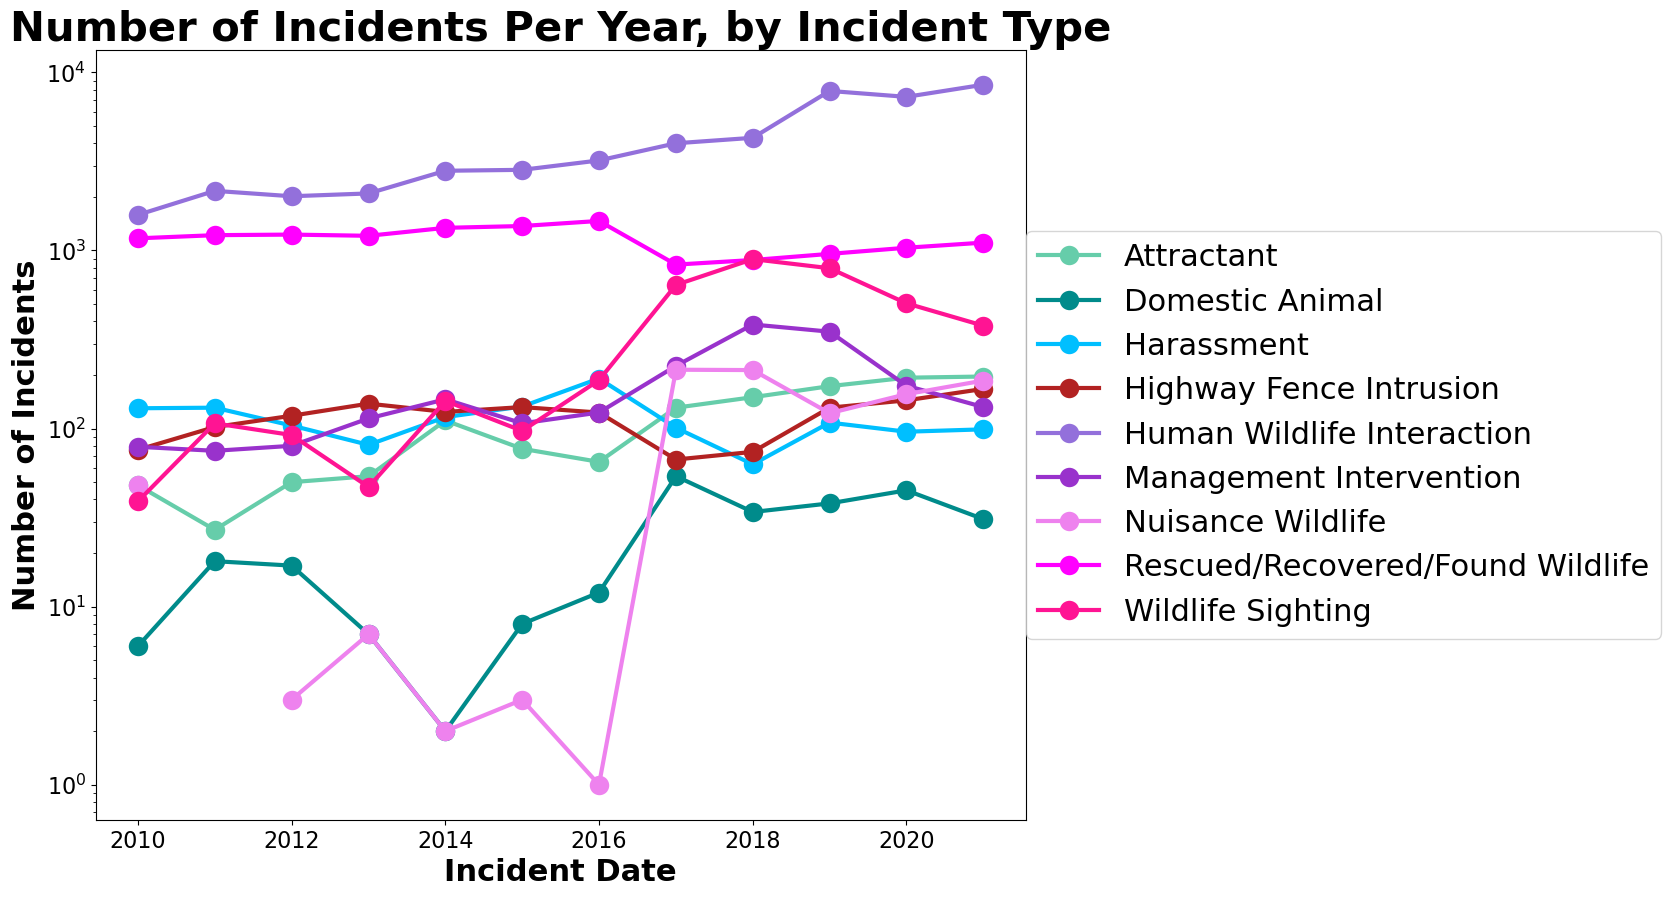

<Figure size 640x2000 with 0 Axes>

In [163]:
#Note, I've applied a logarithmic y-scale to be able to better view the x values which had very low y values.

plot_colors = ["mediumaquamarine", "darkcyan", "deepskyblue", "firebrick", "mediumpurple", "darkorchid", "violet", "magenta", "deeppink", "palevioletred", "rosybrown", "lightcoral", "red", "sienna", "saddlebrown", "peru", "darkorange", "tan", "goldenrod", "gold", "darkkhaki", "olive", "yellowgreen", "olivedrab", "chartreuse", "darkseagreen", "palegreen", "forestgreen", "limegreen", "mediumspringgreen"]
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plot_colors)

#Plot elongated to be able to better view the distinct lines with lower values.
plt.figure(figsize=(12, 10));
plt.plot(IncidentsByYear, label=IncidentsByYear.columns, marker="o", mew=8, linewidth=3);
plt.xlabel("Incident Date", fontweight="bold", size = 22);
plt.ylabel("Number of Incidents", fontweight="bold", size = 22);
plt.xticks(size=16)
plt.yticks(size=16)
plt.yscale('log')
plt.legend(loc='right', prop={"size":22}, bbox_to_anchor=(1.7, 0.5))
plt.title("Number of Incidents Per Year, by Incident Type", fontweight="bold", size = 30);
plt.figure().set_figheight(20);
plt.show();

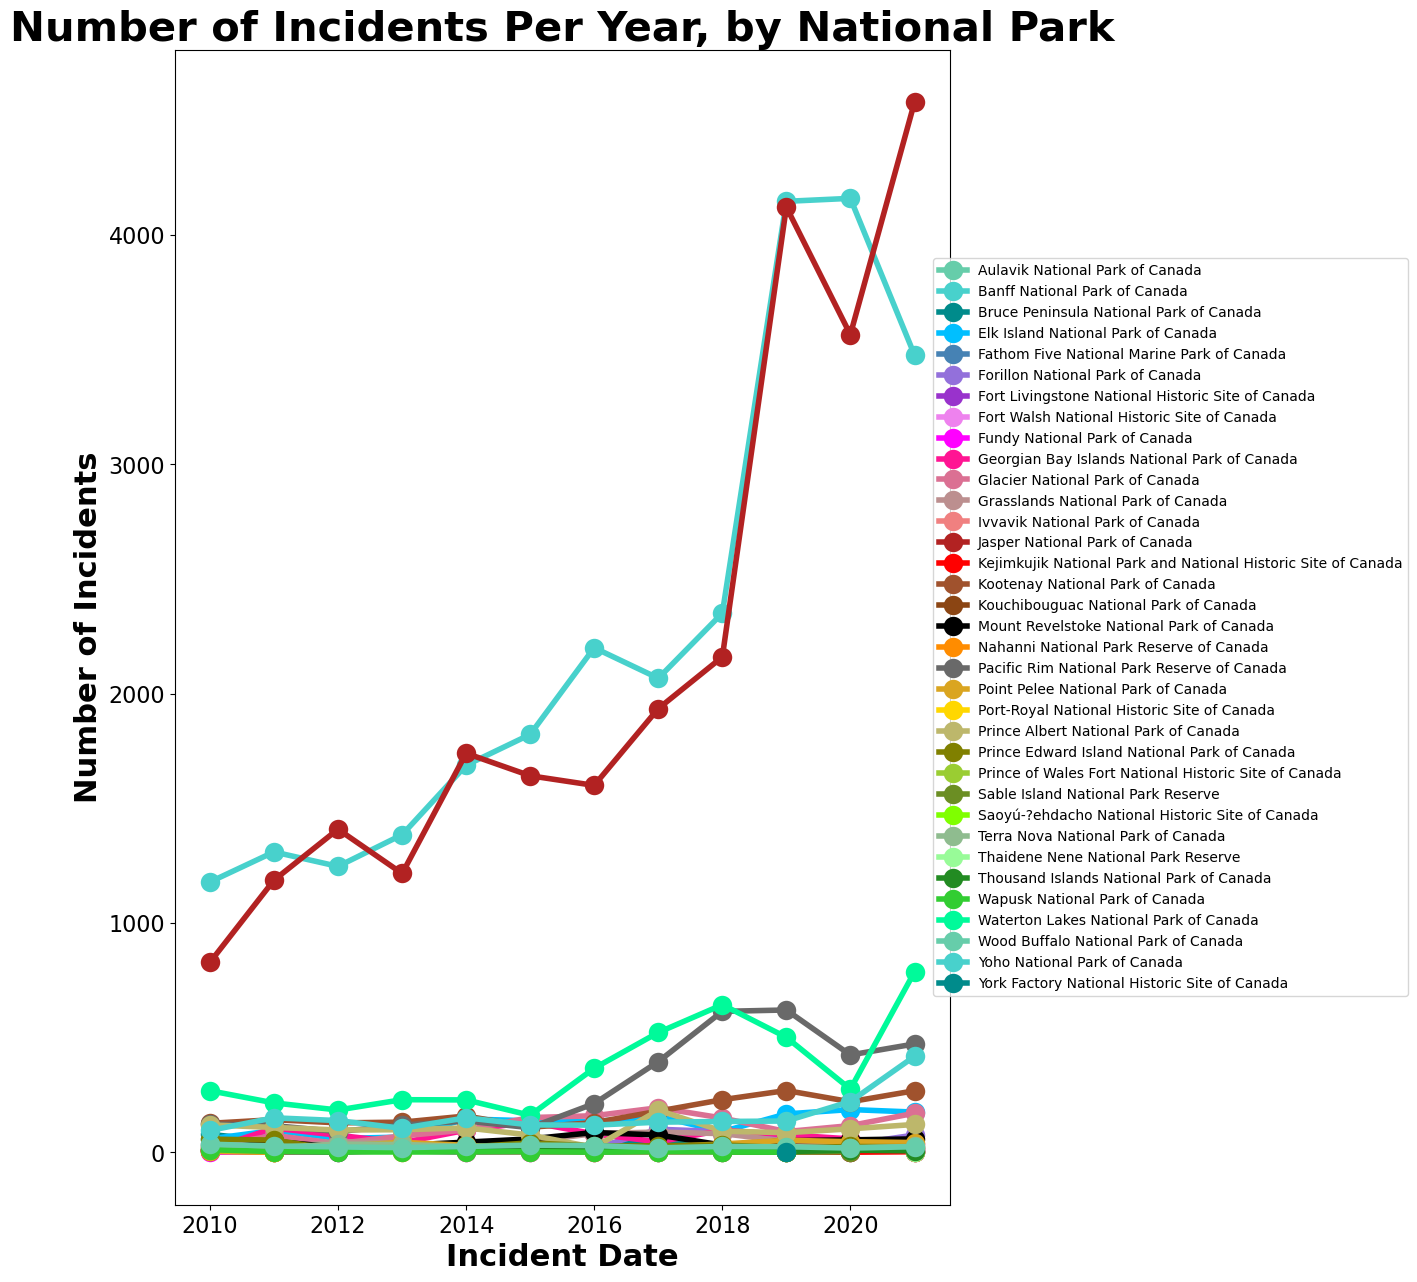

<Figure size 640x2000 with 0 Axes>

In [169]:
#Modifying color cycler so that the colors are not repeating across different parks.
plot_colors = ["mediumaquamarine", "mediumturquoise", "darkcyan", "deepskyblue", "steelblue", "mediumpurple", "darkorchid", "violet", "magenta", "deeppink", "palevioletred", "rosybrown", "lightcoral", "firebrick", "red", "sienna", "saddlebrown", "black", "darkorange", "dimgrey", "goldenrod", "gold", "darkkhaki", "olive", "yellowgreen", "olivedrab", "chartreuse", "darkseagreen", "palegreen", "forestgreen", "limegreen", "mediumspringgreen"]
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plot_colors)

plt.figure(figsize=(10, 15));
plt.plot(IncidentsByYearByPark, label=IncidentsByYearByPark.columns, marker="o", mew=8, linewidth=4);
plt.xlabel("Incident Date", fontweight="bold", size = 22);
plt.ylabel("Number of Incidents", fontweight="bold", size = 22);
plt.xticks(size=16)
plt.yticks(size=16)
#plt.yscale('log')
plt.legend(loc='right', bbox_to_anchor=(1.6, 0.5), prop={"size":10})
plt.title("Number of Incidents Per Year, by National Park", fontweight="bold", size = 30);
plt.figure().set_figheight(20);
plt.show();

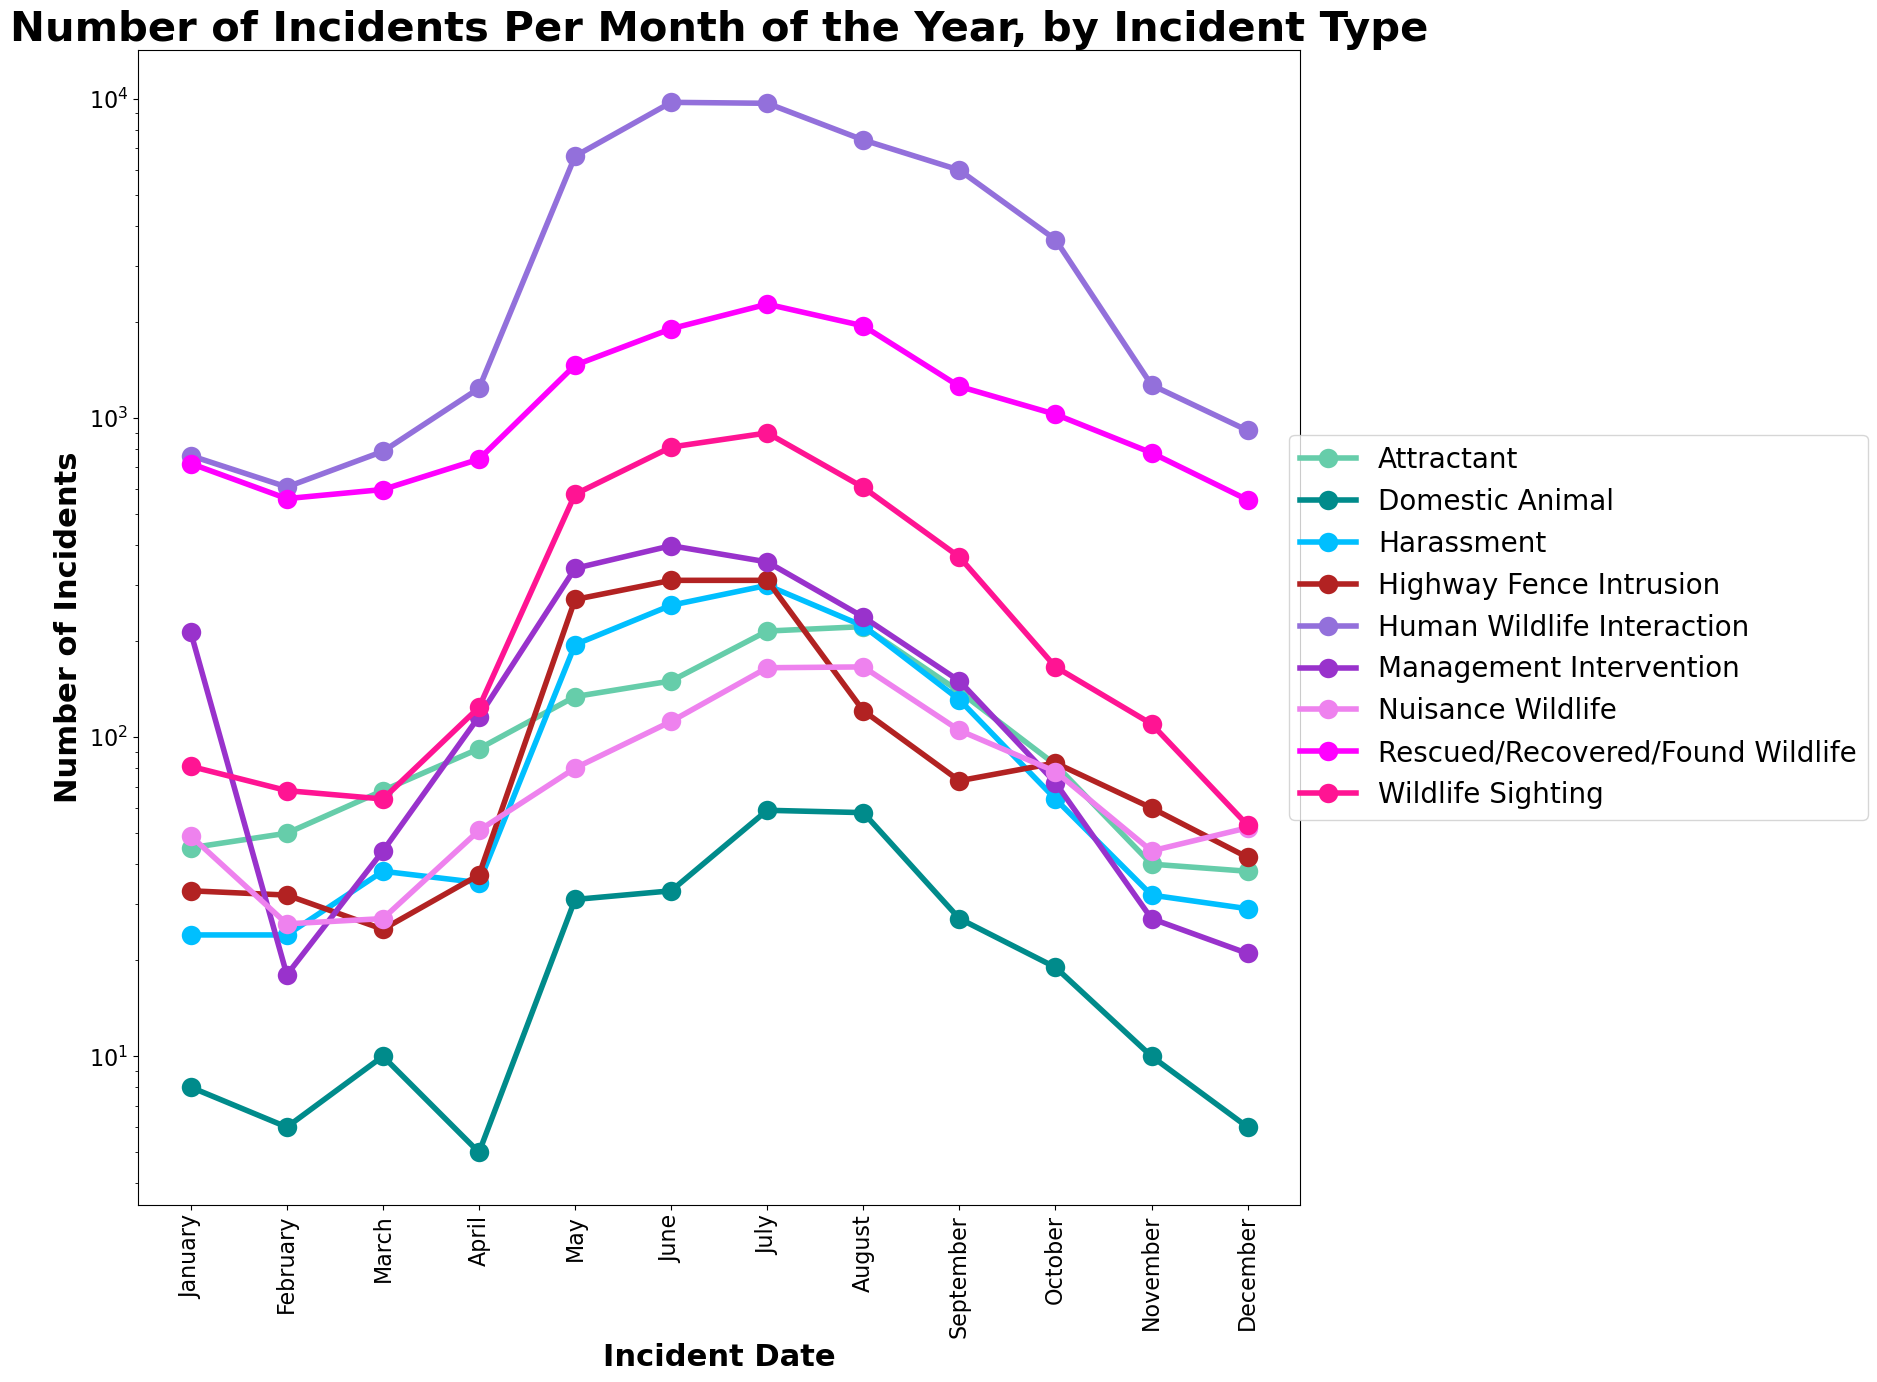

<Figure size 640x2000 with 0 Axes>

In [167]:
#Note, I've applied a logarithmic y-scale to be able to better view the x values which had very low y values.

plot_colors = ["mediumaquamarine", "darkcyan", "deepskyblue", "firebrick", "mediumpurple", "darkorchid", "violet", "magenta", "deeppink", "palevioletred", "rosybrown", "lightcoral", "red", "sienna", "saddlebrown", "peru", "darkorange", "tan", "goldenrod", "gold", "darkkhaki", "olive", "yellowgreen", "olivedrab", "chartreuse", "darkseagreen", "palegreen", "forestgreen", "limegreen", "mediumspringgreen"]
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plot_colors)

plt.figure(figsize=(15,15));
plt.plot(IncidentsByMonth, label=IncidentsByYear.columns, marker="o", mew=8, linewidth=4);
plt.xlabel("Incident Date", fontweight="bold", size = 22);
plt.ylabel("Number of Incidents", fontweight="bold", size = 22);
plt.xticks(rotation="vertical", size=16)
plt.yticks(size=16)
plt.yscale('log')
plt.legend(loc='right', bbox_to_anchor=(1.5, 0.5), prop={"size":20})
plt.title("Number of Incidents Per Month of the Year, by Incident Type", fontweight="bold", size = 30);
plt.figure().set_figheight(20);
plt.show();

**ANALYSIS AFTER PLOTTING**

**Research Question 1:** What patterns can be found in location and time of year for each of the following variables: human activities, animals involved, cause, and incident type. How do these patterns differ year over year?

-	The Parks with the most incidents are Banff and Jasper. 
- Almost half the number of Parks have fewer than 100 Incidents
-	The majority of Animal Health Status’s are “Healthy”. 
-	The majority of Incident Types are Human Wildlife Interaction, and the next highest is Rescued/Recovered/Found Wildlife. 
-	The most frequent animals involved in incidents are Black bears, Elk, Grizzly bears, and Mule deer. 
- The top 4 most frequent Activity Types across incidents were Camping - Frontcountry, Hiking / Walking, Townsite Activity, and Driving    
- The top 4 most frequent Response Types across incidents were Dispose Carcass, Monitor - patrol, Investigate Incident, and Haze - Soft.
-	Year Trend: Incident Types: the Human Wildlife Interaction Incident Type has Increased significantly, Rescued/Recovered/Found Wildlife has slightly decreased over time. Wildlife Sighting and Management Intervention both seemed to spike around 2018. 
-	Year Trend: Parks: Jasper and Banff both increased in number of incident types over the years, with Jasper going up in 2021 and Banff going down in 2021. All other parks seems to have mainly remained at a similar level each year, with Waterton and Pacific Rim having some increase over the years. 
-	Month trend: All Incidents increase during the months between May to October. 


In [25]:
#If needed to reset color cycler back to default
#import matplotlib as mpl
#from cycler import cycler
#mpl.rcParams['axes.prop_cycle'] = cycler(color='bgrcmyk')